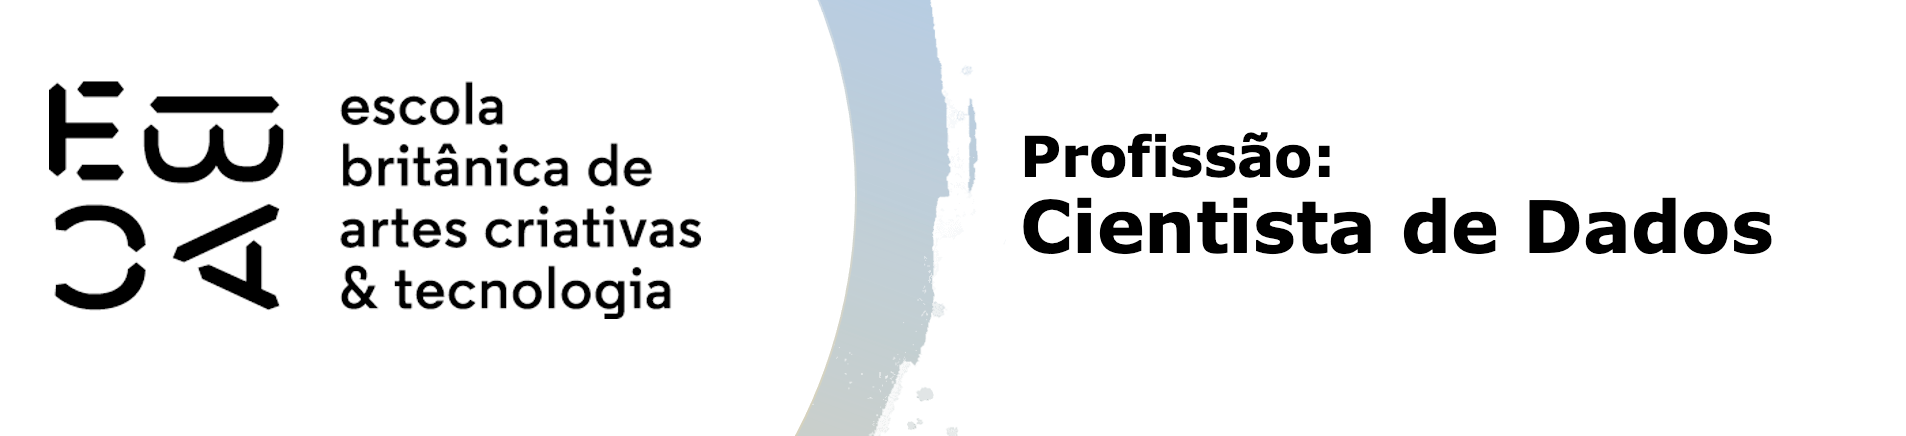

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
sns.set_theme(style="darkgrid")

In [6]:
df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [9]:
# Transformar a variável resposta em inteiro

df['mau'] = df.mau.astype('int64')
#drop da coluna index
df.drop('index', axis=1, inplace=True)

#verificando a data maxima
df['data_ref'] = df['data_ref'].dt.to_period('M')
df['data_ref'].max()

Period('2016-03', 'M')

In [11]:
# Separando os tres ultimos meses para validação/teste out of time

df_train = df[df['data_ref'] < '2016-01']
df_test = df[df['data_ref'] >= '2016-01']

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

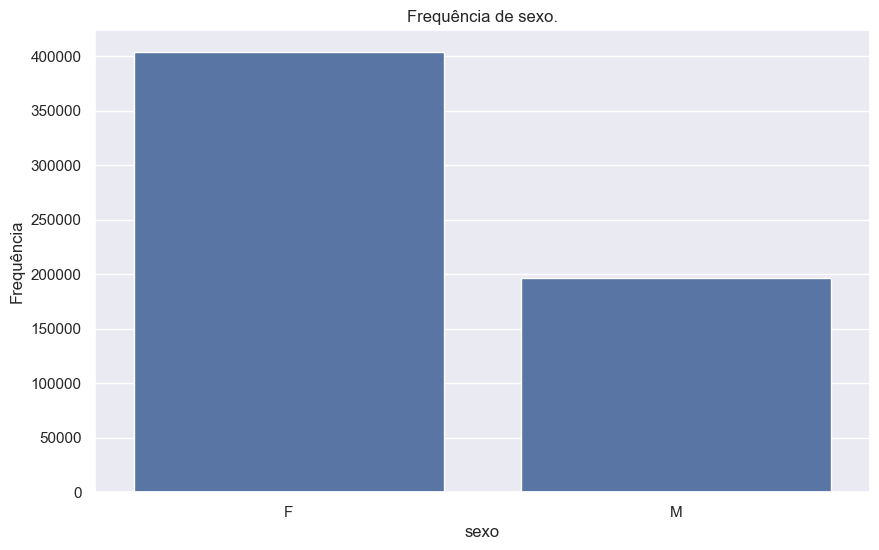

In [18]:
# Descritiva da variavel sexo

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='sexo')
plt.title('Frequência de sexo.')
plt.ylabel('Frequência')
plt.show()

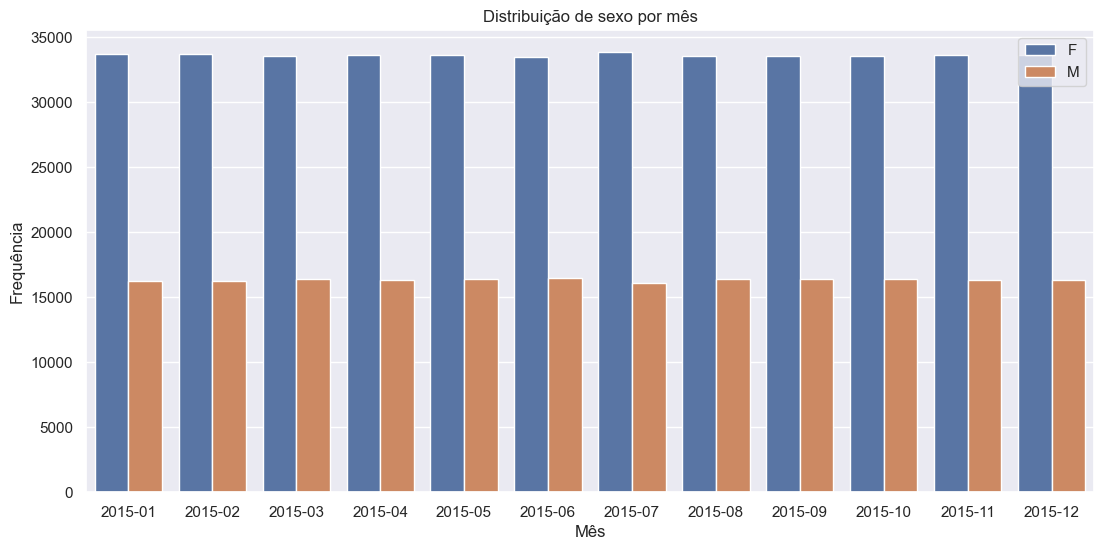

In [19]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='sexo')
plt.legend(loc='best')
plt.title('Distribuição de sexo por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

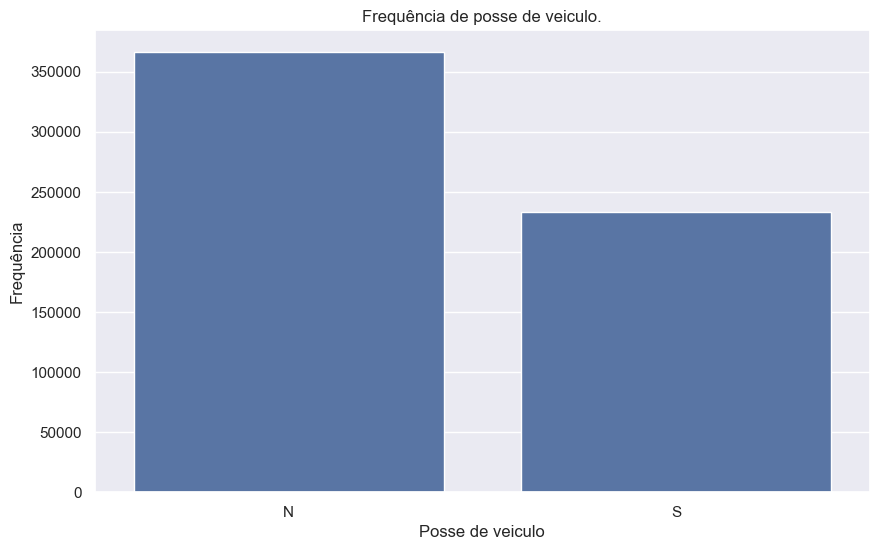

In [20]:
# Descritiva da variavel posse_de_veiculo

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='posse_de_veiculo')
plt.title('Frequência de posse de veiculo.')
plt.ylabel('Frequência')
plt.xlabel('Posse de veiculo')
plt.show()

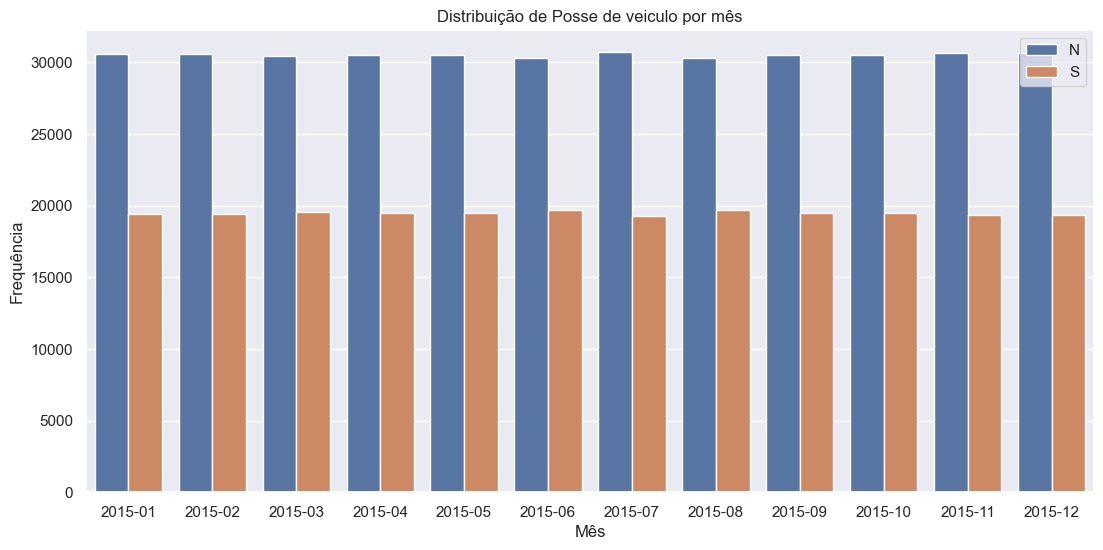

In [21]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='posse_de_veiculo')
plt.legend(loc='best')
plt.title('Distribuição de Posse de veiculo por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

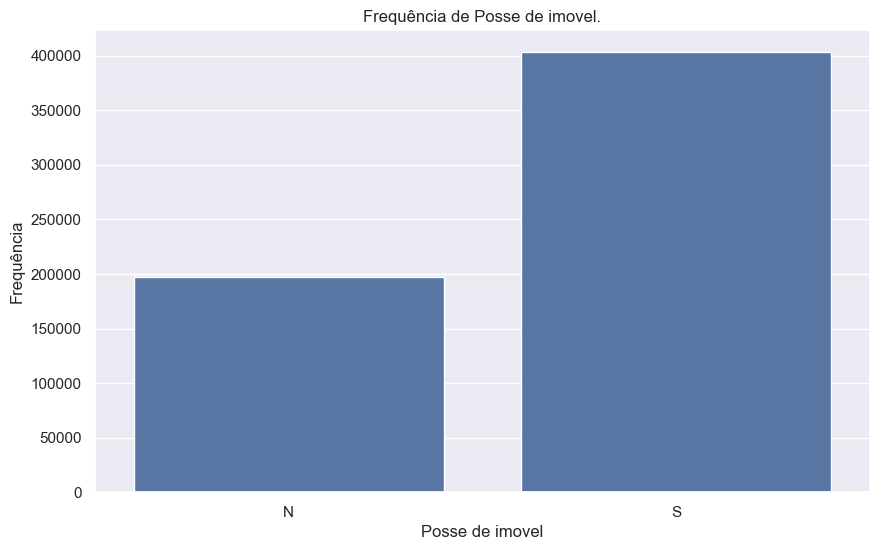

In [22]:
# Descritiva da variavel posse_de_imovel

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='posse_de_imovel')
plt.title('Frequência de Posse de imovel.')
plt.ylabel('Frequência')
plt.xlabel('Posse de imovel')
plt.show()

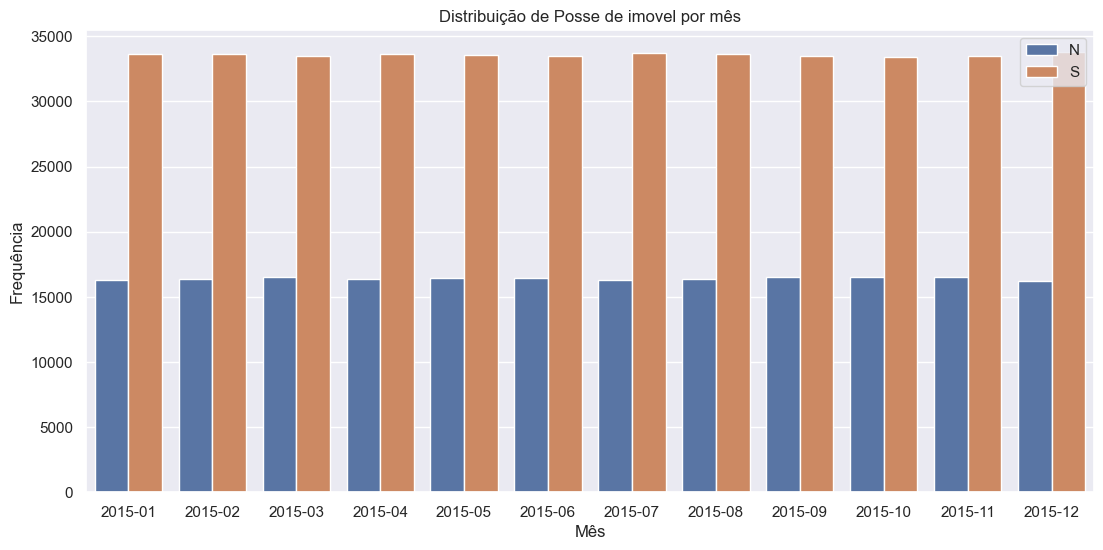

In [23]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='posse_de_imovel')
plt.legend(loc='best')
plt.title('Distribuição de Posse de imovel por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

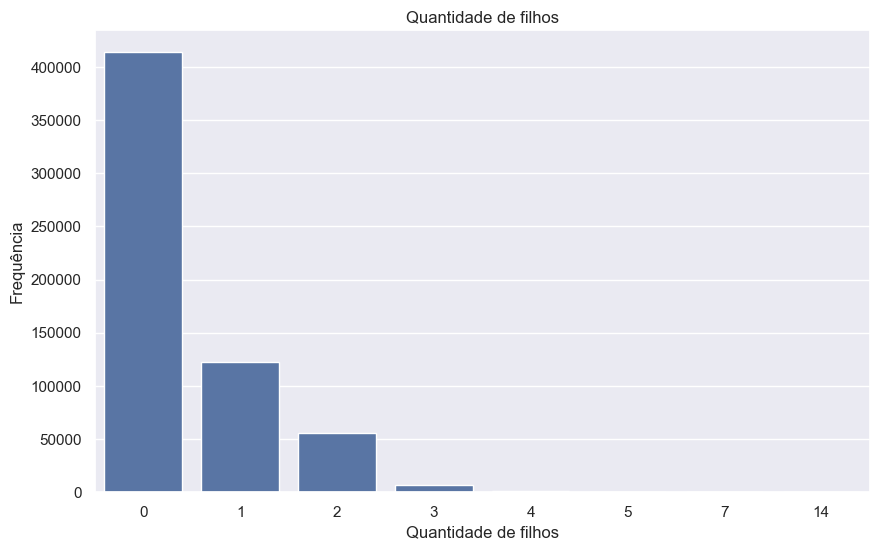

In [24]:
# Descritiva da variavel qtd_filhos

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='qtd_filhos')
plt.title('Quantidade de filhos')
plt.ylabel('Frequência')
plt.xlabel('Quantidade de filhos')
plt.show()

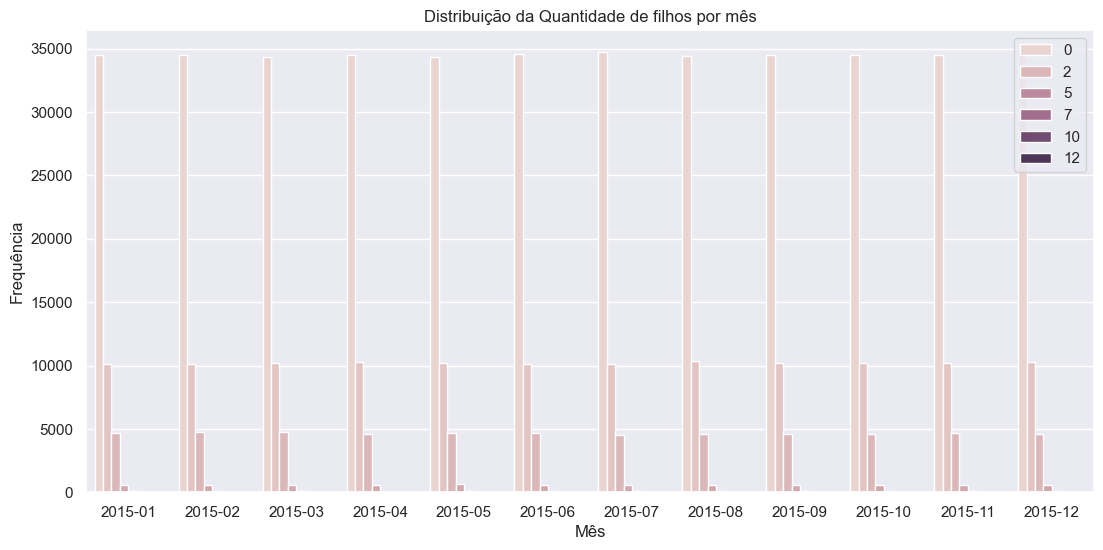

In [25]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='qtd_filhos')
plt.legend(loc='best')
plt.title('Distribuição da Quantidade de filhos por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

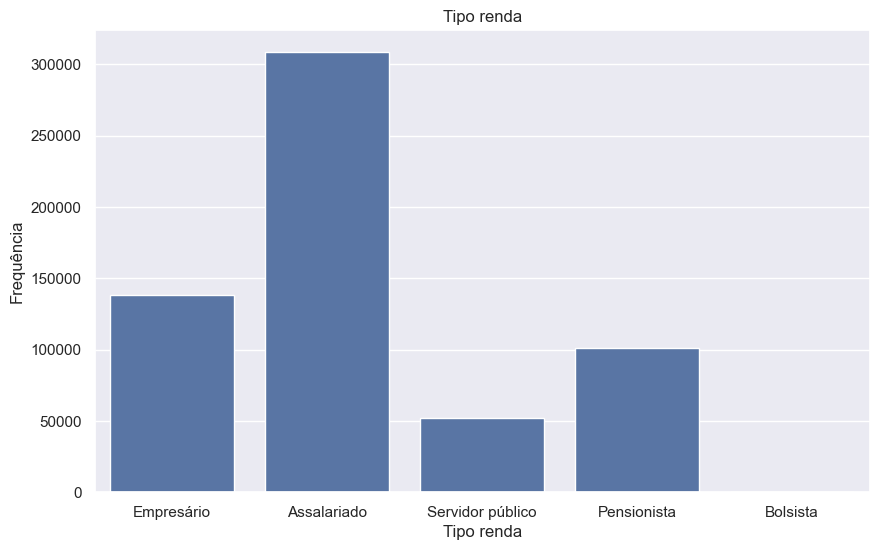

In [26]:
# Descritiva da variavel tipo_renda

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='tipo_renda')
plt.title('Tipo renda')
plt.ylabel('Frequência')
plt.xlabel('Tipo renda')
plt.show()

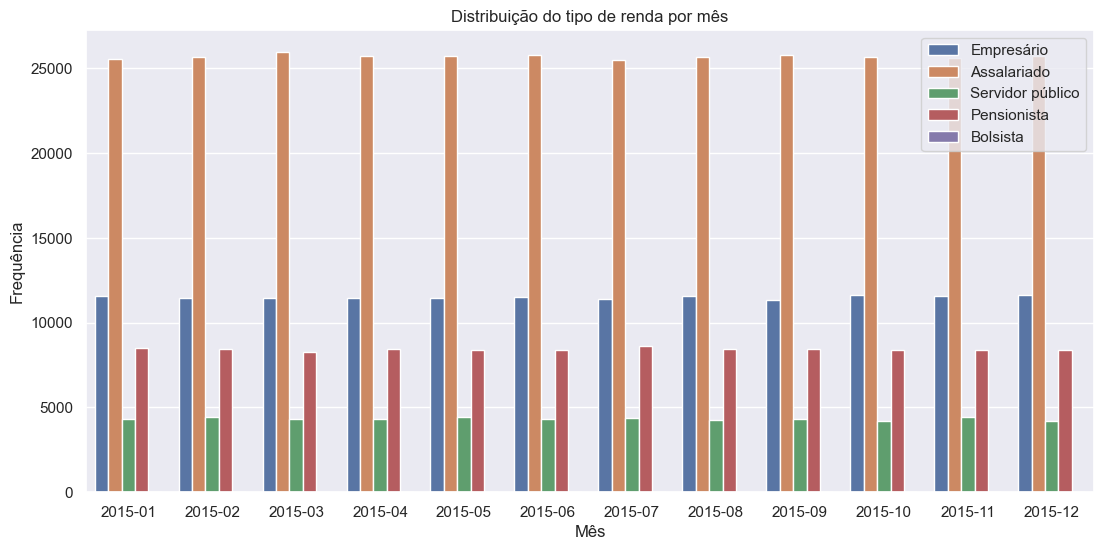

In [27]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='tipo_renda')
plt.legend(loc='best')
plt.title('Distribuição do tipo de renda por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

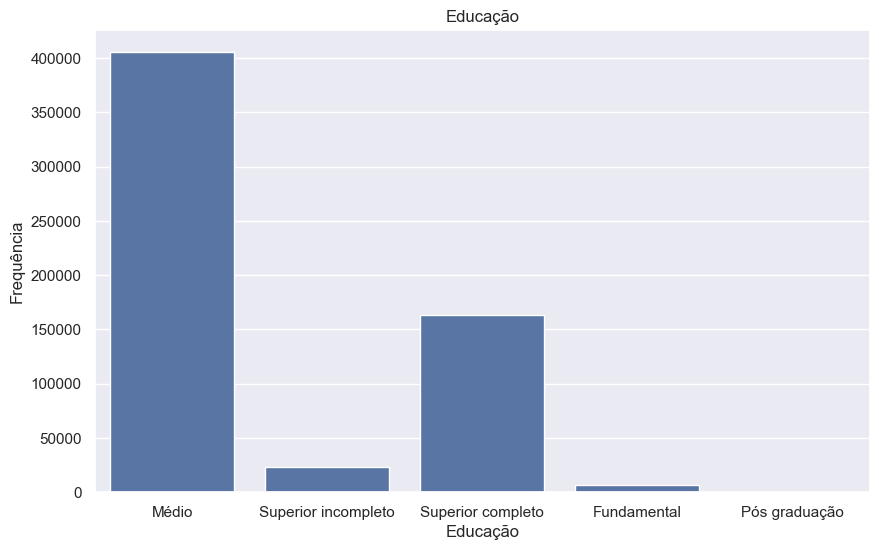

In [28]:
# Descritiva da variavel educacao.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='educacao')
plt.title('Educação')
plt.ylabel('Frequência')
plt.xlabel('Educação')
plt.show()

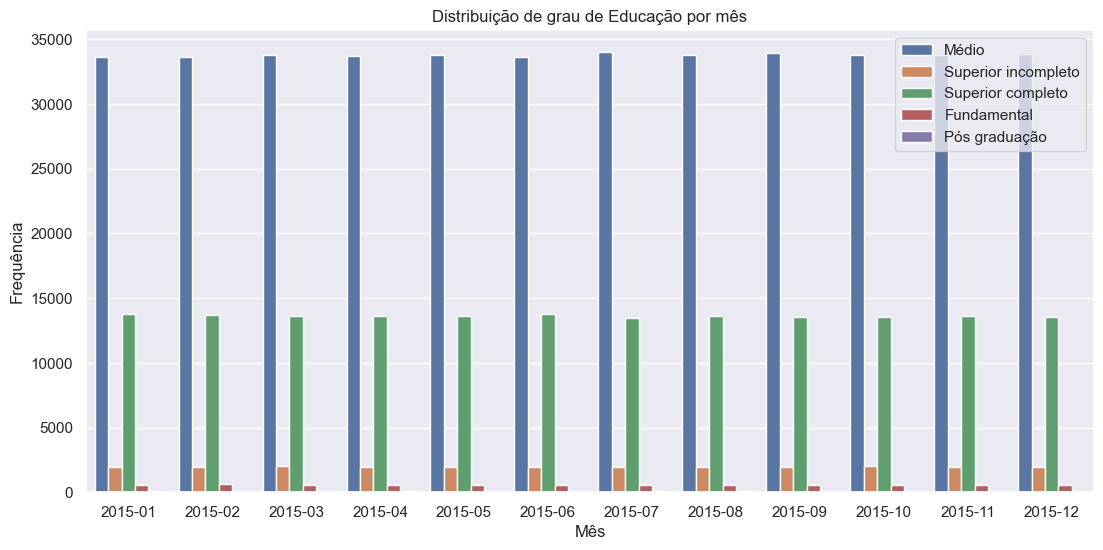

In [29]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='educacao')
plt.legend(loc='best')
plt.title('Distribuição de grau de Educação por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

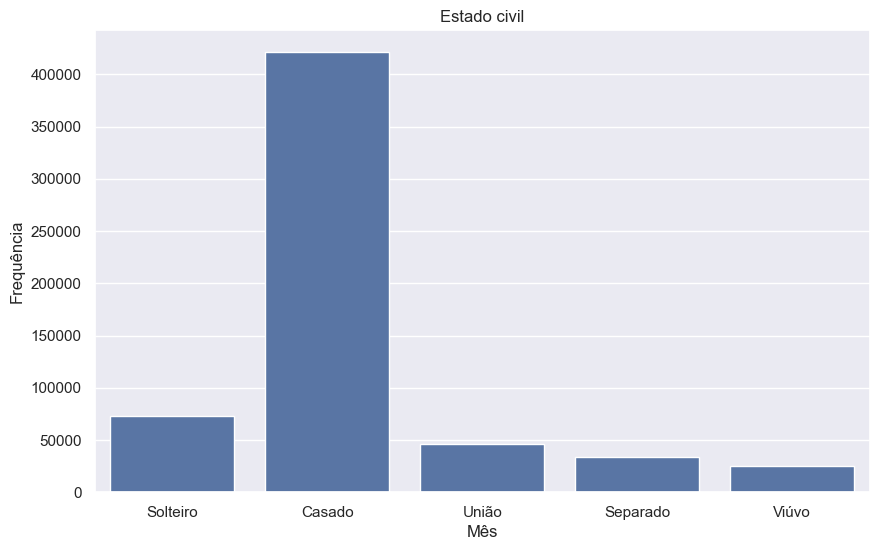

In [34]:
#Descritiva da variavel estado_civil

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='estado_civil')
plt.title('Estado civil')
plt.ylabel('Frequência')
plt.xlabel('Mês')
plt.show()

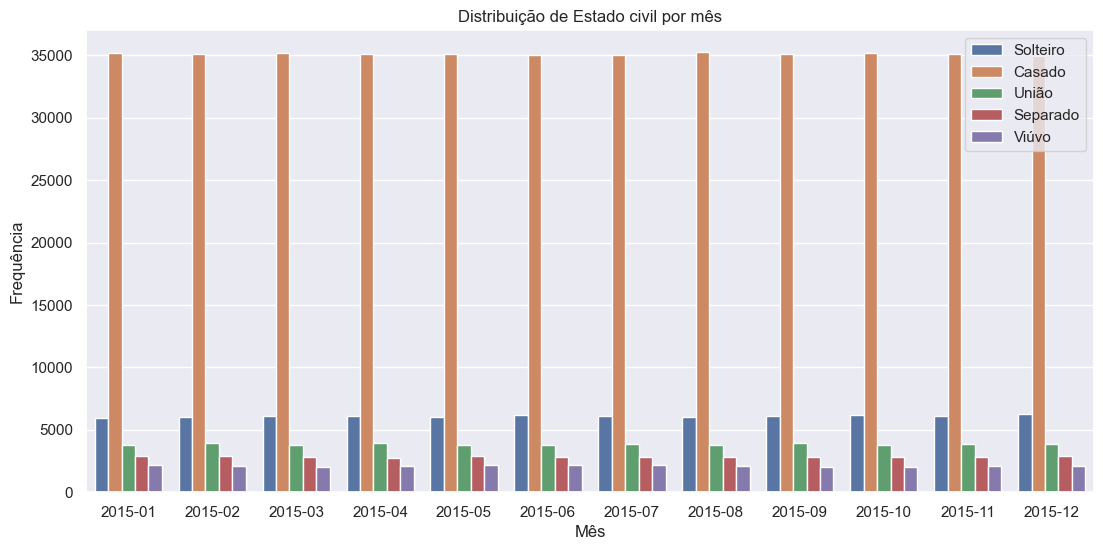

In [36]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='estado_civil')
plt.legend(loc='best')
plt.title('Distribuição de Estado civil por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

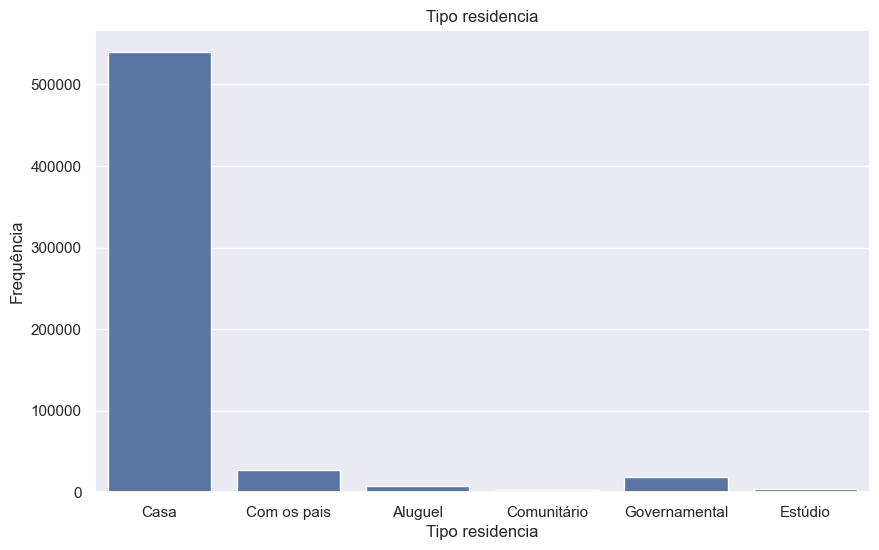

In [38]:
# Descritiva da variavel tipo_residencia

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='tipo_residencia')
plt.title('Tipo residencia')
plt.ylabel('Frequência')
plt.xlabel('Tipo residencia')
plt.show()

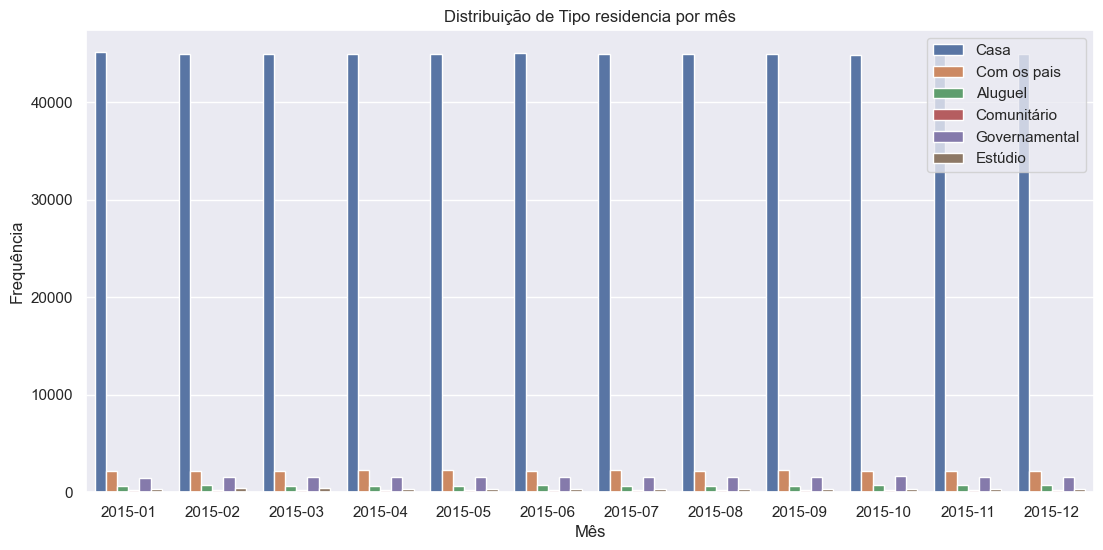

In [40]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='tipo_residencia')
plt.legend(loc='best')
plt.title('Distribuição de Tipo residencia por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

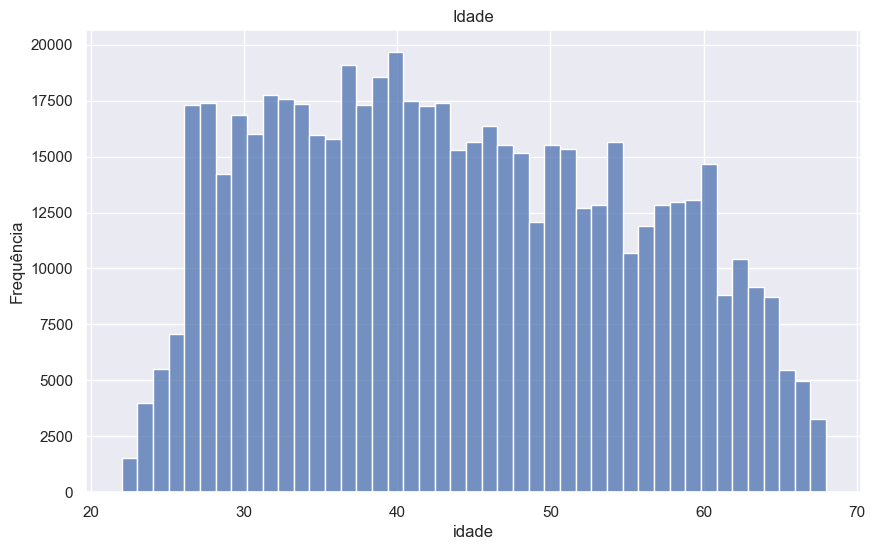

In [42]:
# Descritiva da variavel idade

plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='idade', bins=45)
plt.title('Idade')
plt.ylabel('Frequência')
plt.xlabel('idade')
plt.show()

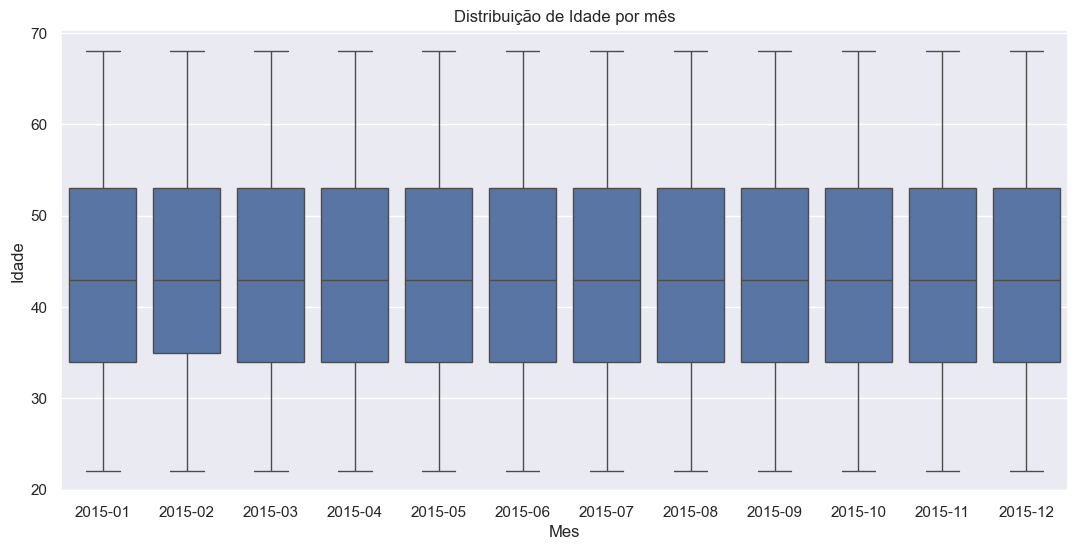

In [44]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=df_train, x='data_ref', y='idade')
plt.title('Distribuição de Idade por mês')
plt.xlabel('Mes')
plt.ylabel('Idade')
plt.show()

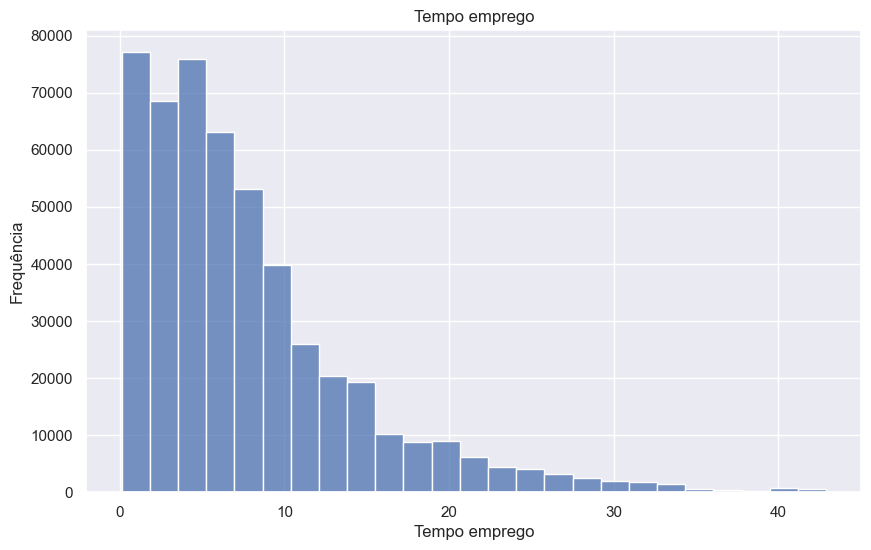

In [46]:
# Descritiva da variavel tempo_emprego

plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='tempo_emprego', bins=25)
plt.title('Tempo emprego')
plt.ylabel('Frequência')
plt.xlabel('Tempo emprego')
plt.show()

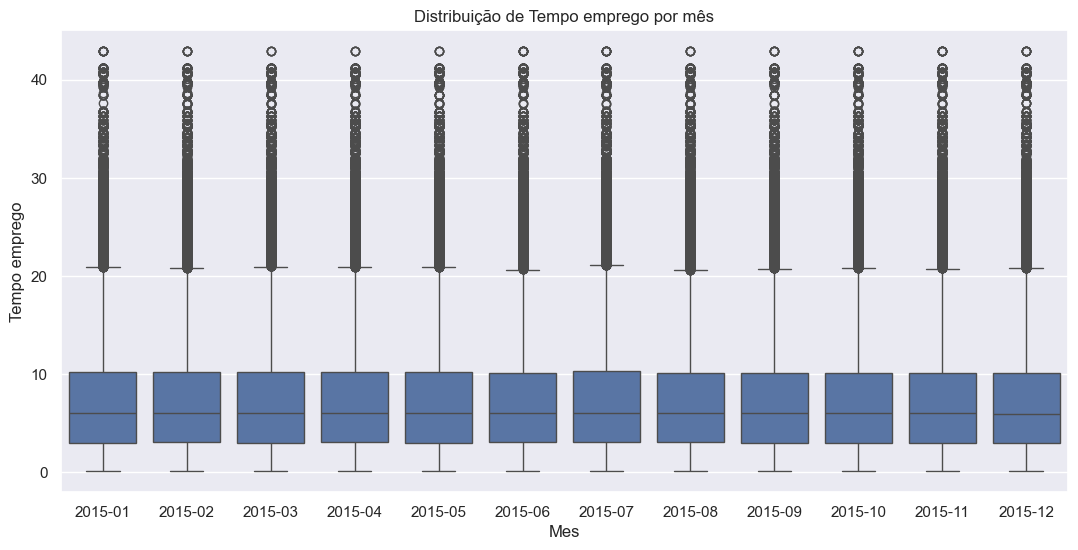

In [48]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=df_train, x='data_ref', y='tempo_emprego')
plt.title('Distribuição de Tempo emprego por mês')
plt.xlabel('Mes')
plt.ylabel('Tempo emprego')
plt.show()

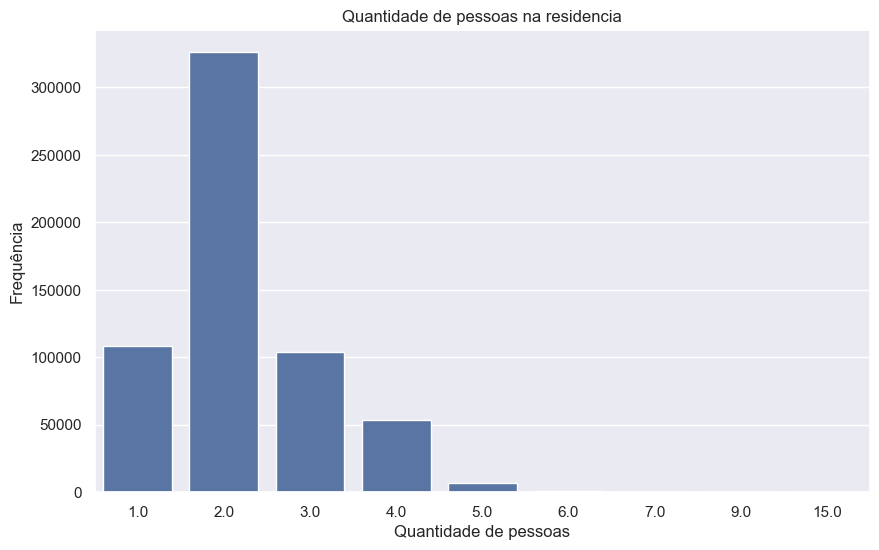

In [50]:
# Descritiva da variavel qt_pessoas_residencia

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='qt_pessoas_residencia')
plt.title('Quantidade de pessoas na residencia')
plt.ylabel('Frequência')
plt.xlabel('Quantidade de pessoas')
plt.show()

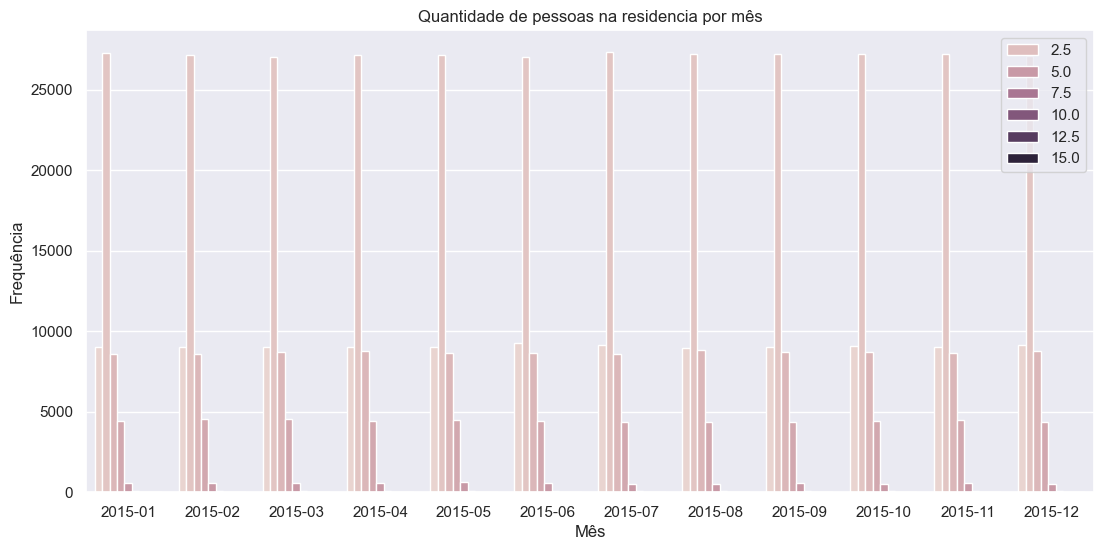

In [52]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='qt_pessoas_residencia')
plt.legend(loc='best')
plt.title('Quantidade de pessoas na residencia por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

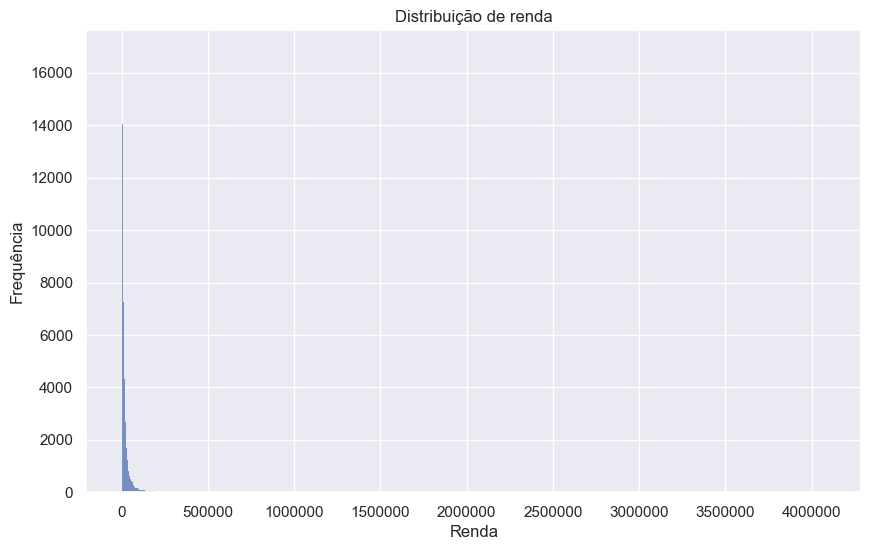

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='renda')
plt.title('Distribuição de renda')
plt.ylabel('Frequência')
plt.xlabel('Renda')

plt.ticklabel_format(style='plain',
                     axis='x')  # Desativa a anotação científica no eixo X
plt.show()

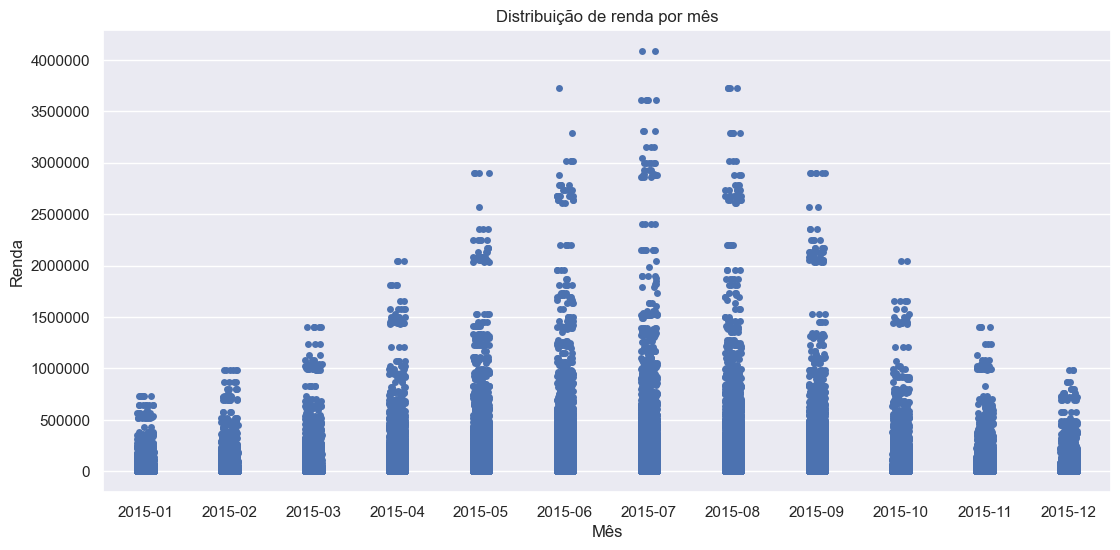

In [56]:
plt.figure(figsize=(13, 6))
sns.stripplot(data=df_train, x='data_ref', y='renda')
plt.title('Distribuição de renda por mês')
plt.xlabel('Mês')
plt.ylabel('Renda')

plt.ticklabel_format(style='plain',
                     axis='y')  # Desativa a anotação científica no eixo y
plt.show()

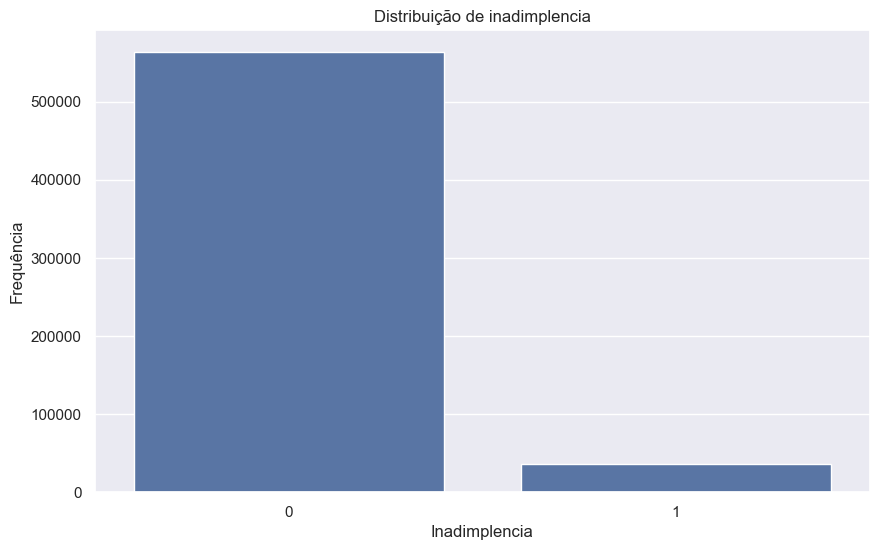

In [58]:
# Descritiva da variavel mau

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='mau')
plt.title('Distribuição de inadimplencia')
plt.ylabel('Frequência')
plt.xlabel('Inadimplencia')
plt.show()

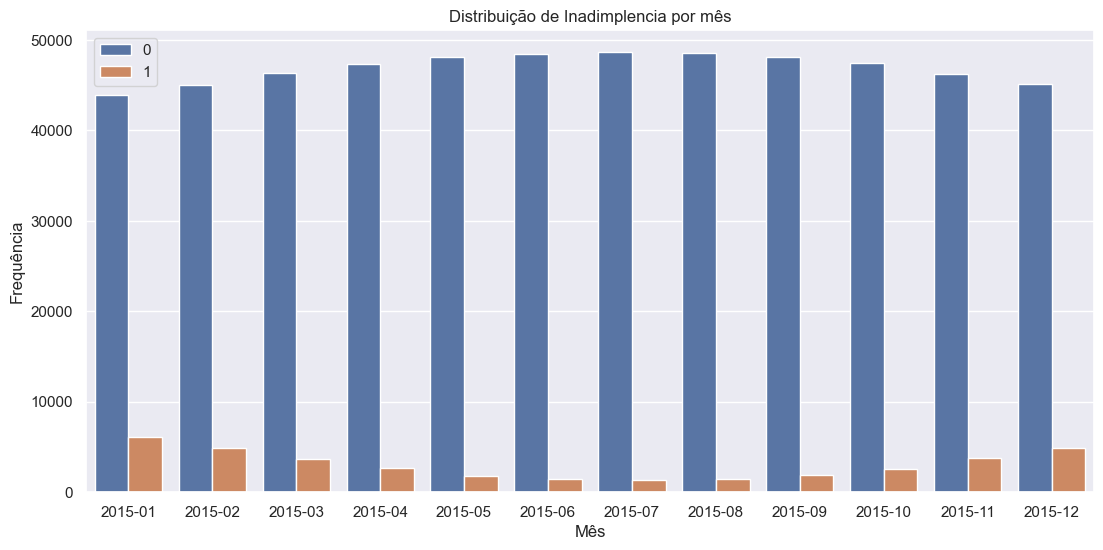

In [60]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df_train, x='data_ref', hue='mau')
plt.legend(loc='best')
plt.title('Distribuição de Inadimplencia por mês')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.show()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [62]:
# Função para gerar os gráficos

def biva(x, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))

    sns.pointplot(x=x,
                  y='renda',
                  hue='mau',
                  data=df_train,
                  dodge=True,
                  errorbar=('ci', 95))
    plt.title(title)
    plt.legend(loc='best')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

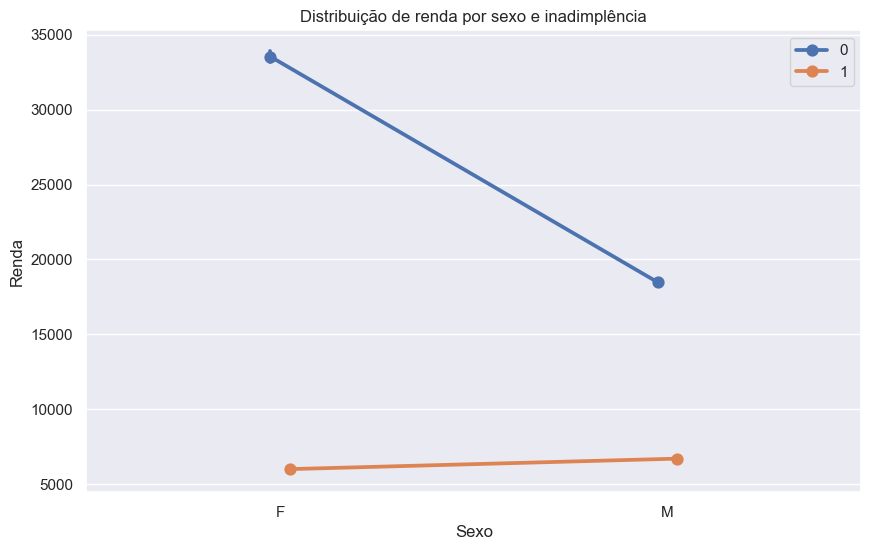

In [64]:
biva("sexo", "Distribuição de renda por sexo e inadimplência", "Sexo", "Renda")

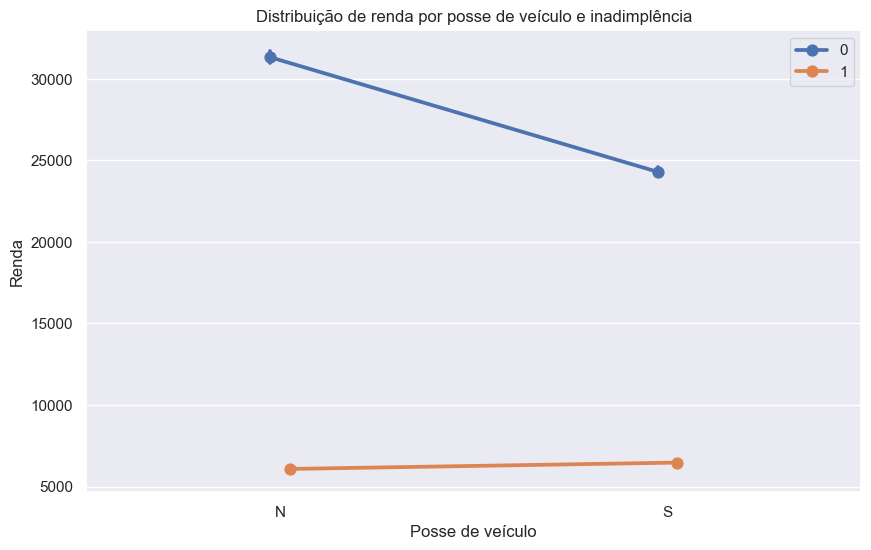

In [66]:
biva("posse_de_veiculo",
     "Distribuição de renda por posse de veículo e inadimplência",
     "Posse de veículo", "Renda")

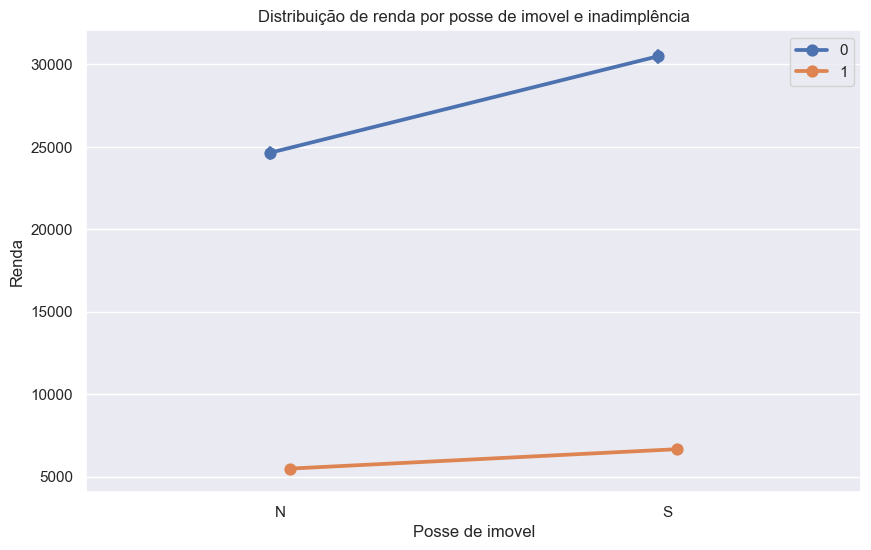

In [68]:
biva("posse_de_imovel",
     "Distribuição de renda por posse de imovel e inadimplência",
     "Posse de imovel", "Renda")

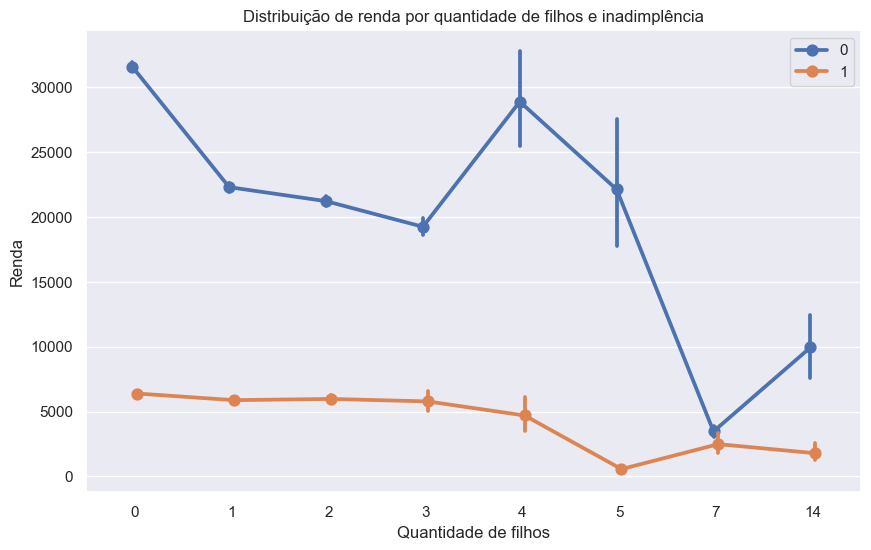

In [69]:
biva("qtd_filhos",
     "Distribuição de renda por quantidade de filhos e inadimplência",
     "Quantidade de filhos", "Renda")

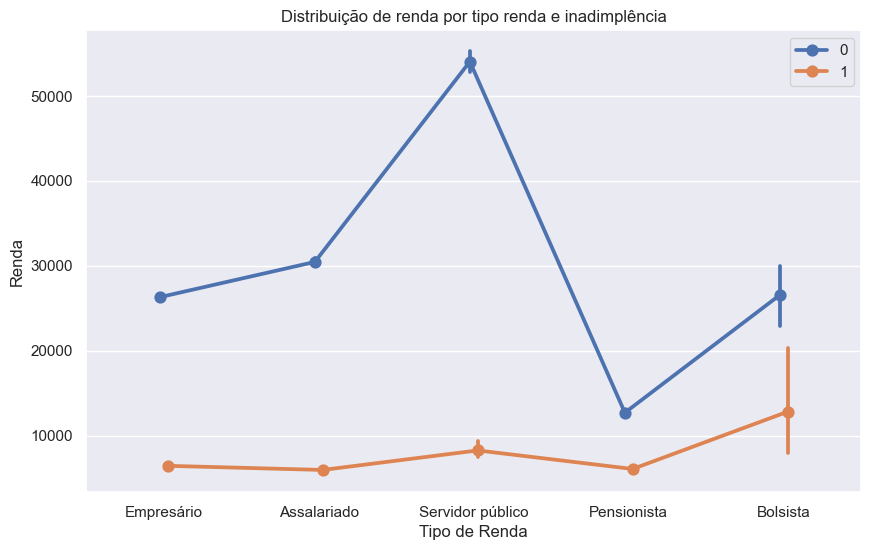

In [70]:
biva("tipo_renda", "Distribuição de renda por tipo renda e inadimplência",
     "Tipo de Renda", "Renda")

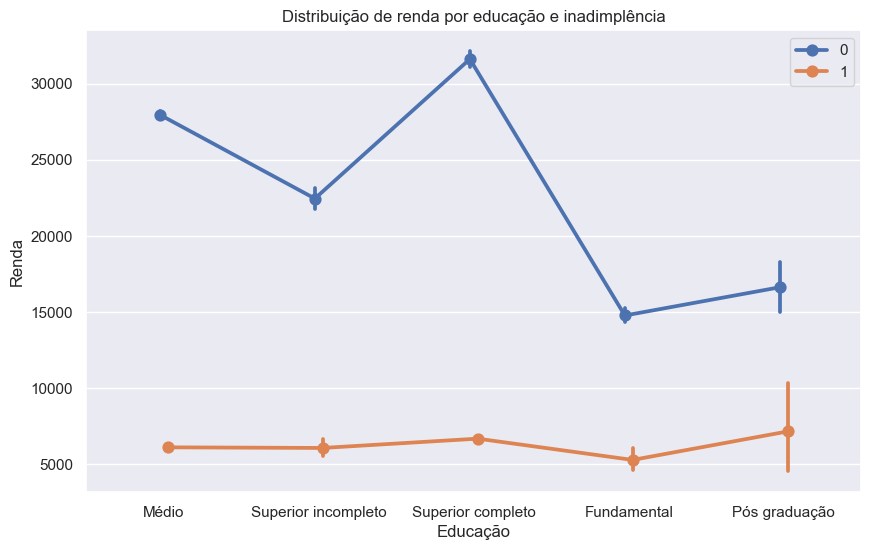

In [71]:
biva("educacao", "Distribuição de renda por educação e inadimplência",
     "Educação", "Renda")

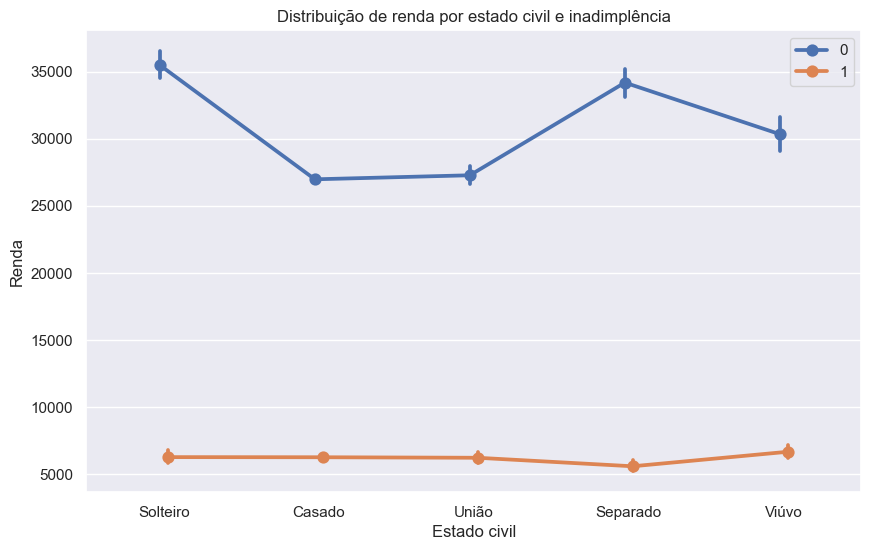

In [72]:
biva("estado_civil", "Distribuição de renda por estado civil e inadimplência",
     "Estado civil", "Renda")

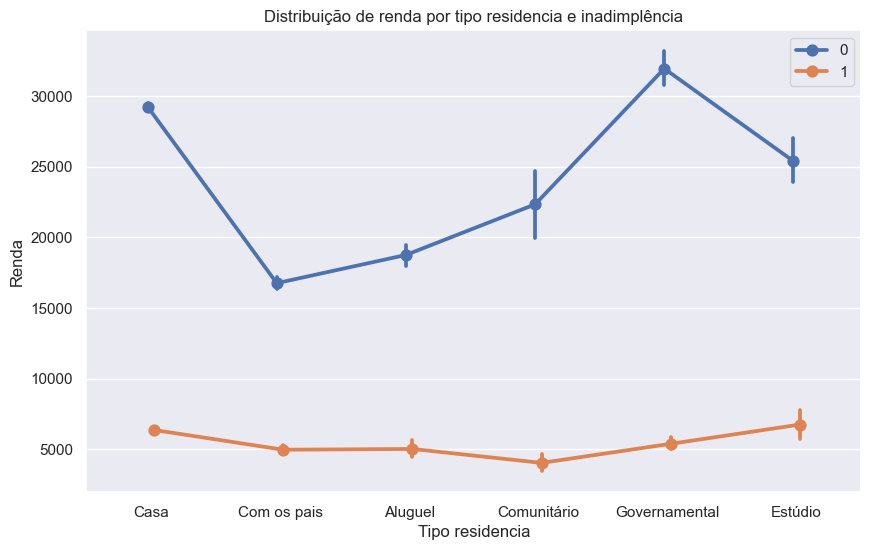

In [74]:
biva("tipo_residencia",
     "Distribuição de renda por tipo residencia e inadimplência",
     "Tipo residencia", "Renda")

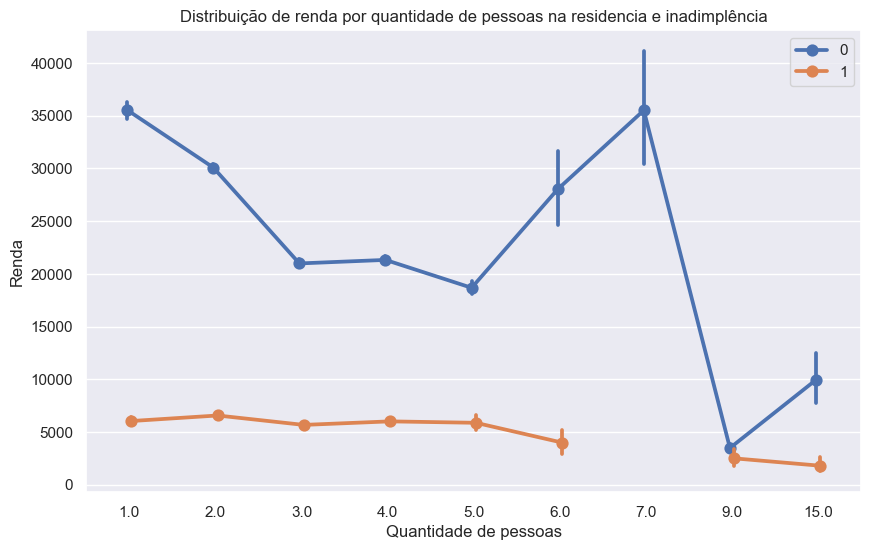

In [75]:
biva(
    "qt_pessoas_residencia",
    "Distribuição de renda por quantidade de pessoas na residencia e inadimplência",
    "Quantidade de pessoas", "Renda")

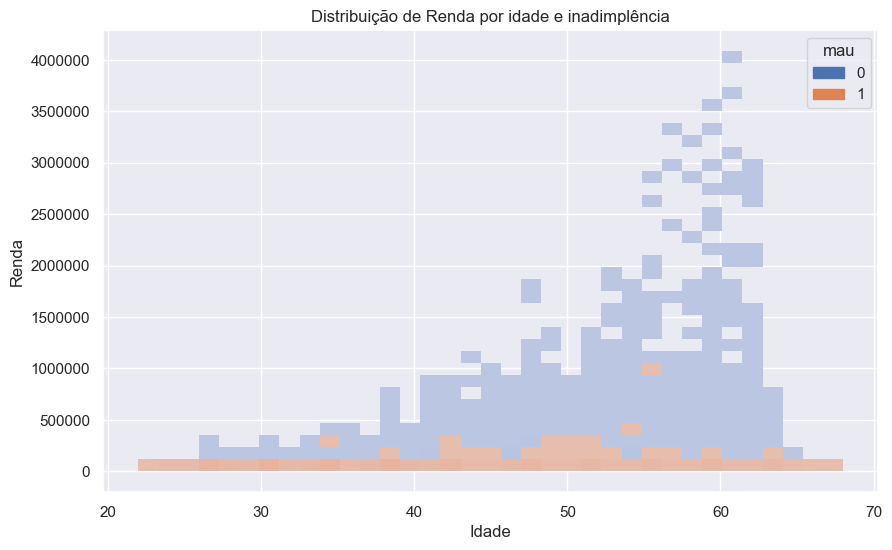

In [76]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_train, x='idade', y='renda', hue='mau', bins=35)
plt.title('Distribuição de Renda por idade e inadimplência')
plt.xlabel('Idade')
plt.ylabel("Renda")

plt.ticklabel_format(style='plain',
                     axis='y')  

plt.show()

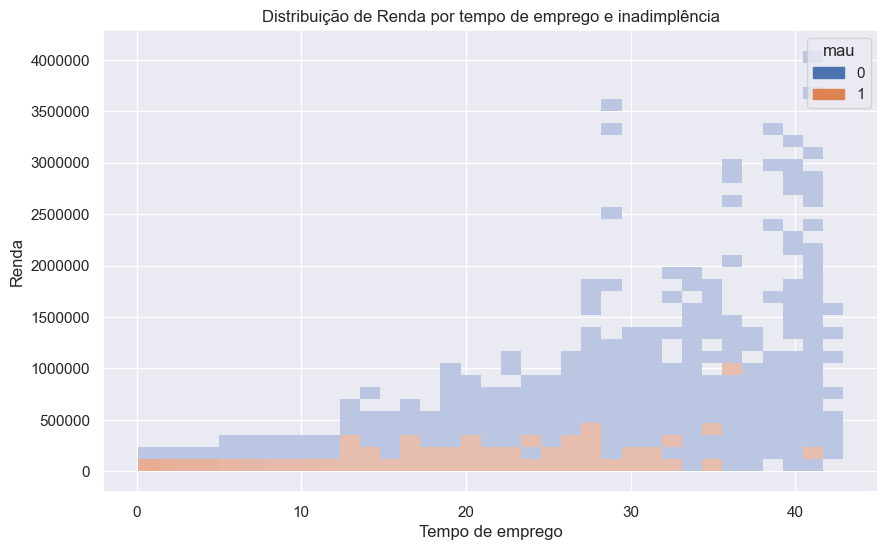

In [77]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_train, x='tempo_emprego', y='renda', hue='mau', bins=35)
plt.title('Distribuição de Renda por tempo de emprego e inadimplência')
plt.xlabel('Tempo de emprego')
plt.ylabel("Renda")

plt.ticklabel_format(style='plain',
                     axis='y')  #

plt.show()

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [140]:
# Verificando e tratando valores nulos

df_train.isna().sum()

sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            100875
qt_pessoas_residencia         0
renda                         0
mau                           0
bom                           0
dtype: int64

In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sexo                   600000 non-null  object 
 1   posse_de_veiculo       600000 non-null  object 
 2   posse_de_imovel        600000 non-null  object 
 3   qtd_filhos             600000 non-null  int64  
 4   tipo_renda             600000 non-null  object 
 5   educacao               600000 non-null  object 
 6   estado_civil           600000 non-null  object 
 7   tipo_residencia        600000 non-null  object 
 8   idade                  600000 non-null  int64  
 9   tempo_emprego          499125 non-null  float64
 10  qt_pessoas_residencia  600000 non-null  float64
 11  renda                  600000 non-null  float64
 12  mau                    600000 non-null  int64  
 13  bom                    600000 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory

In [144]:
# Remoção de outliers

df_train.tempo_emprego.describe()

count    499125.000000
mean          7.747992
std           6.688576
min           0.117808
25%           3.049315
50%           6.046575
75%          10.180822
max          42.906849
Name: tempo_emprego, dtype: float64

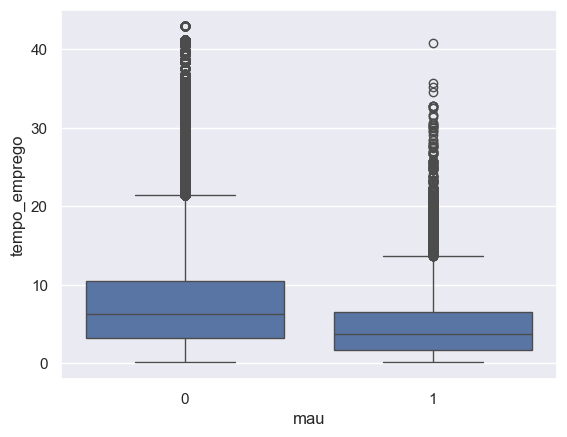

In [146]:
sns.boxplot(data=df_train, x='mau', y='tempo_emprego')
plt.show()

In [148]:
# Remover os outliers de tempo de emprego
emprego = df_train['tempo_emprego'].loc[df_train['mau'] == 1].values
# Valores do quartil 25 e quartil 75
q25, q75 = np.percentile(emprego, 25), np.percentile(emprego, 75)
print('QUARTIL 25: {} | QUARTIL 75: {}'.format(q25, q75))
# Interquartile range
emprego_iqr = q75 - q25
print('IQR: ', emprego_iqr)

# Limiar
emprego_cut_off = emprego_iqr * 1.5
# Limite superior e inferior
emprego_lower, emprego_upper = q25 - emprego_cut_off, q75 + emprego_cut_off
print('LIMIAR: ', emprego_cut_off)
print('Tempo emprego LIMITE INFERIOR', emprego_lower)
print('Tempo emprego LIMITE SUPERIOR', emprego_upper)

# Ouliers (fora os limites estabelecidos anteriormente)
outliers = [x for x in emprego if x < emprego_lower or x > emprego_upper]
print('Tempo emprego QUANTIDADE DE OUTLIERS EM MAU PAGADORES:', len(outliers))

# Novo dataframe sem os outliers
df_train = df_train.drop(
    df_train[(df_train['tempo_emprego'] > emprego_upper) |
             (df_train['tempo_emprego'] < emprego_lower)].index)
print('----' * 44)

QUARTIL 25: nan | QUARTIL 75: nan
IQR:  nan
LIMIAR:  nan
Tempo emprego LIMITE INFERIOR nan
Tempo emprego LIMITE SUPERIOR nan
Tempo emprego QUANTIDADE DE OUTLIERS EM MAU PAGADORES: 0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


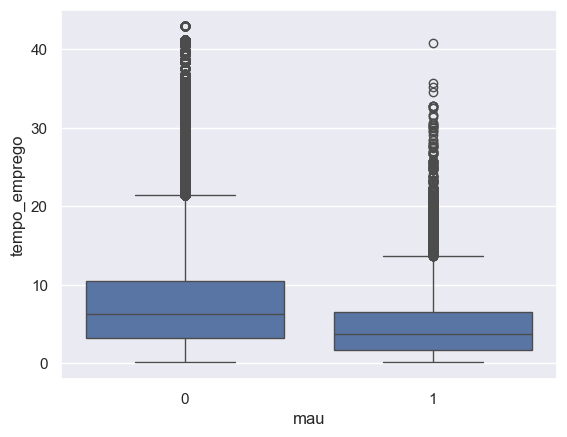

In [150]:
sns.boxplot(data=df_train, x='mau', y='tempo_emprego')
plt.show()

In [195]:
# Removendo a coluna data_ref dos dataframes

df = df.drop(['data_ref'], axis=1, errors='ignore')
df_train = df_train.drop(['data_ref'], axis=1, errors='ignore')
df_test = df_test.drop(['data_ref'], axis=1, errors='ignore')

In [197]:
# Calculando IV e gerando metadados.

metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique()

In [156]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento] / tab.loc['total', rótulo_evento]
    tab['ep'] = tab[rótulo_evento] / tab.loc['total', rótulo_evento]

    tab['pct_nao_evento'] = tab[rótulo_nao_evento] / tab.loc['total',
                                                             rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento / tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab.woe
    return tab['iv_parcial'].sum()

In [158]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['missing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['mau', 'papel'] = 'resposta'
metadados.loc['bom', 'papel'] = 'resposta'
metadados

,dtype,missing,valores_unicos,papel
sexo,object,0.0,2.0,covariavel
posse_de_veiculo,object,0.0,2.0,covariavel
posse_de_imovel,object,0.0,2.0,covariavel
qtd_filhos,int64,0.0,8.0,covariavel
tipo_renda,object,0.0,5.0,covariavel
educacao,object,0.0,5.0,covariavel
estado_civil,object,0.0,5.0,covariavel
tipo_residencia,object,0.0,6.0,covariavel
idade,int64,0.0,47.0,covariavel
tempo_emprego,float64,125957.0,3004.0,covariavel


In [160]:
for var in metadados[metadados.papel == 'covariavel'].index:
    if (metadados.loc[var, 'valores_unicos'] > 6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var], 5, duplicates='drop'),
                                      df.mau)
    else:
        metadados.loc[var, 'IV'] = IV(df[var], df.mau)
metadados

,dtype,missing,valores_unicos,papel,IV
sexo,object,0.0,2.0,covariavel,0.002185
posse_de_veiculo,object,0.0,2.0,covariavel,0.000108
posse_de_imovel,object,0.0,2.0,covariavel,0.009693
qtd_filhos,int64,0.0,8.0,covariavel,0.000030
tipo_renda,object,0.0,5.0,covariavel,0.009360
educacao,object,0.0,5.0,covariavel,0.003547
estado_civil,object,0.0,5.0,covariavel,0.001126
tipo_residencia,object,0.0,6.0,covariavel,0.003045
idade,int64,0.0,47.0,covariavel,0.017968
tempo_emprego,float64,125957.0,3004.0,covariavel,0.351920


In [161]:
#Trate 'zeros estruturais'
#Faça agrupamentos de categorias conforme vimos em aula


def biv_discreta(var, df):
    df['bom'] = 1 - df.mau
    g = df.groupby(var)

    biv = pd.DataFrame({
        'qt_bom': g['bom'].sum(),
        'qt_mau': g['mau'].sum(),
        'mau': g['mau'].mean(),
        var: g['mau'].mean().index,
        'cont': g[var].count()
    })

    biv['ep'] = (biv.mau * (1 - biv.mau) / biv.cont)**.5
    biv['mau_sup'] = biv.mau + t.ppf([0.975], biv.cont - 1) * biv.ep
    biv['mau_inf'] = biv.mau + t.ppf([0.025], biv.cont - 1) * biv.ep

    biv['logit'] = np.log(biv.mau / (1 - biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup / (1 - biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf / (1 - biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    ax[0].plot(biv[var], biv.woe, ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite inferior')

    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat - .7])

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)

    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)

    ax[1] = biv.cont.plot.bar()
    return biv

In [164]:
def biv_continua(var, ncat, df):
    df['bom'] = 1 - df.mau
    cat_srs, bins = pd.qcut(df[var],
                            ncat,
                            retbins=True,
                            precision=0,
                            duplicates='drop')
    g = df.groupby(cat_srs)

    biv = pd.DataFrame({
        'qt_bom': g['bom'].sum(),
        'qt_mau': g['mau'].sum(),
        'mau': g['mau'].mean(),
        var: g[var].mean(),
        'cont': g[var].count()
    })

    biv['ep'] = (biv.mau * (1 - biv.mau) / biv.cont)**.5
    biv['mau_sup'] = biv.mau + t.ppf([0.975], biv.cont - 1) * biv.ep
    biv['mau_inf'] = biv.mau + t.ppf([0.025], biv.cont - 1) * biv.ep

    biv['logit'] = np.log(biv.mau / (1 - biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup / (1 - biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf / (1 - biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    ax[0].plot(biv[var], biv.woe, ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite inferior')

    num_cat = biv.shape[0]

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)

    ax[1] = biv.cont.plot.bar()
    return None

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Assalariado,288865,19595,0.063525,Assalariado,308460,0.000439,0.064386,0.062665,-2.690685,-2.676307,-2.705246,0.042006,0.056384,0.027445
Bolsista,279,12,0.041237,Bolsista,291,0.011656,0.064178,0.018296,-3.146305,-2.679758,-3.982616,-0.413614,0.052933,-1.249925
Empresário,129935,8206,0.059403,Empresário,138141,0.000636,0.060650,0.058157,-2.762169,-2.740076,-2.784700,-0.029478,-0.007385,-0.052009
Pensionista,94627,6500,0.064276,Pensionista,101127,0.000771,0.065787,0.062764,-2.678141,-2.653280,-2.703552,0.054550,0.079411,0.029139
Servidor público,49651,2330,0.044824,Servidor público,51981,0.000908,0.046603,0.043045,-3.059150,-3.018369,-3.101504,-0.326459,-0.285678,-0.368813


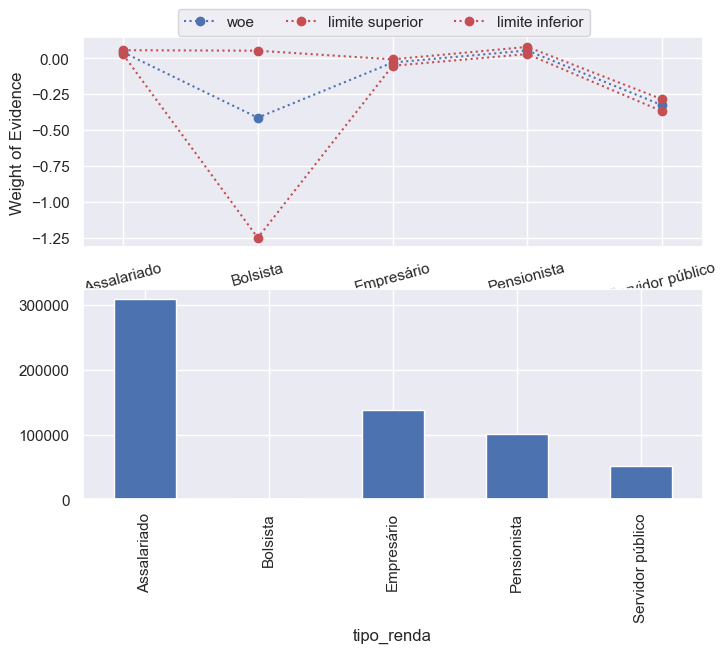

In [166]:
biv_discreta('tipo_renda', df_train)

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Empresário,129935,8206,0.059403,Empresário,138141,0.000636,0.060650,0.058157,-2.762169,-2.740076,-2.784700,-0.029478,-0.007385,-0.052009
Renda fixa,383492,26095,0.063711,Renda fixa,409587,0.000382,0.064458,0.062963,-2.687575,-2.675104,-2.700183,0.045116,0.057587,0.032508
Serv.Publico./Estudante,49930,2342,0.044804,Serv.Publico./Estudante,52272,0.000905,0.046578,0.043031,-3.059617,-3.018938,-3.101860,-0.326926,-0.286247,-0.369169


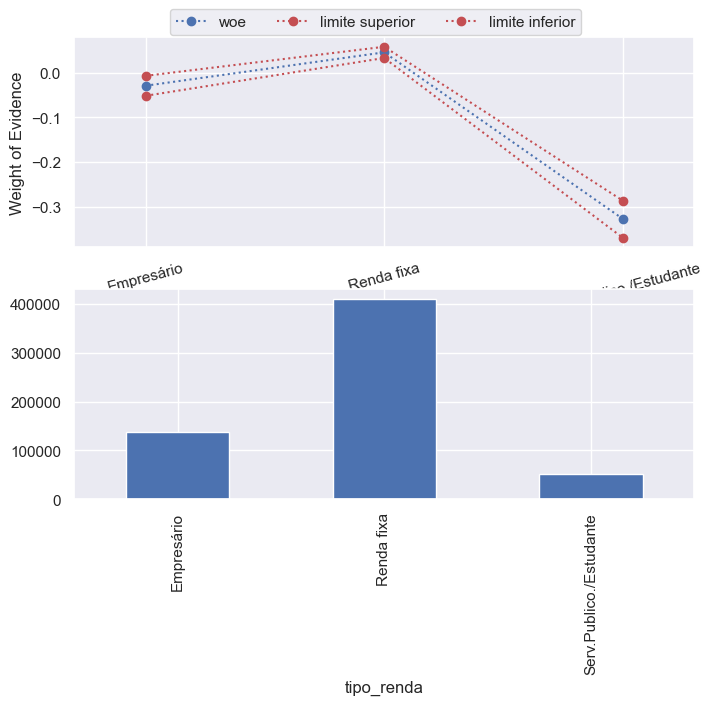

In [168]:
df1_train = df_train.copy()
df1_train.tipo_renda.replace(
    {
        'Bolsista': 'Serv.Publico./Estudante',
        'Servidor público': 'Serv.Publico./Estudante',
        'Assalariado': 'Renda fixa',
        'Pensionista': 'Renda fixa'
    },
    inplace=True)
biv_discreta('tipo_renda', df1_train)

,qt_bom,qt_mau,mau,tipo_residencia,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_residencia,,,,,,,,,,,,,,
Aluguel,7666,596,0.072137,Aluguel,8262,0.002846,0.077717,0.066558,-2.554310,-2.473779,-2.640804,0.178382,0.258912,0.091887
Casa,506887,32449,0.060165,Casa,539336,0.000324,0.060799,0.059530,-2.748618,-2.737450,-2.759898,-0.015927,-0.004759,-0.027207
Com os pais,24733,1997,0.074710,Com os pais,26730,0.001608,0.077862,0.071558,-2.516492,-2.471755,-2.563000,0.216199,0.260936,0.169691
Comunitário,2449,185,0.070235,Comunitário,2634,0.004979,0.079999,0.060472,-2.583079,-2.442363,-2.743199,0.149612,0.290329,-0.010508
Estúdio,4071,225,0.052374,Estúdio,4296,0.003399,0.059038,0.045711,-2.895544,-2.768721,-3.038637,-0.162852,-0.036030,-0.305946
Governamental,17551,1191,0.063547,Governamental,18742,0.001782,0.067040,0.060054,-2.690318,-2.633076,-2.750571,0.042373,0.099615,-0.017880


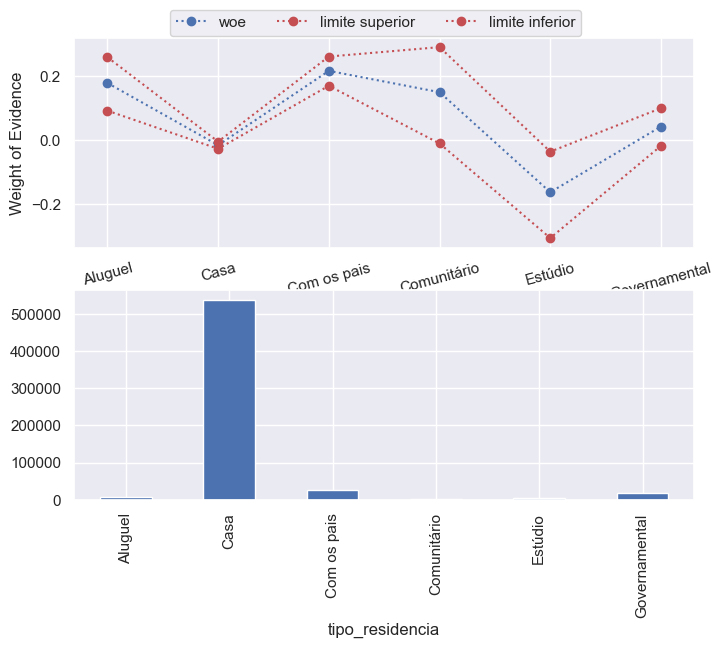

In [170]:
biv_discreta('tipo_residencia', df_train)

,qt_bom,qt_mau,mau,tipo_residencia,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_residencia,,,,,,,,,,,,,,
Aluguel/comunitario/Auxilio,52399,3969,0.070412,Aluguel/comunitario/Auxilio,56368,0.001078,0.072524,0.068300,-2.580373,-2.548544,-2.613098,0.152318,0.184147,0.119593
Casa,510958,32674,0.060103,Casa,543632,0.000322,0.060735,0.059471,-2.749708,-2.738578,-2.760947,-0.017017,-0.005887,-0.028256


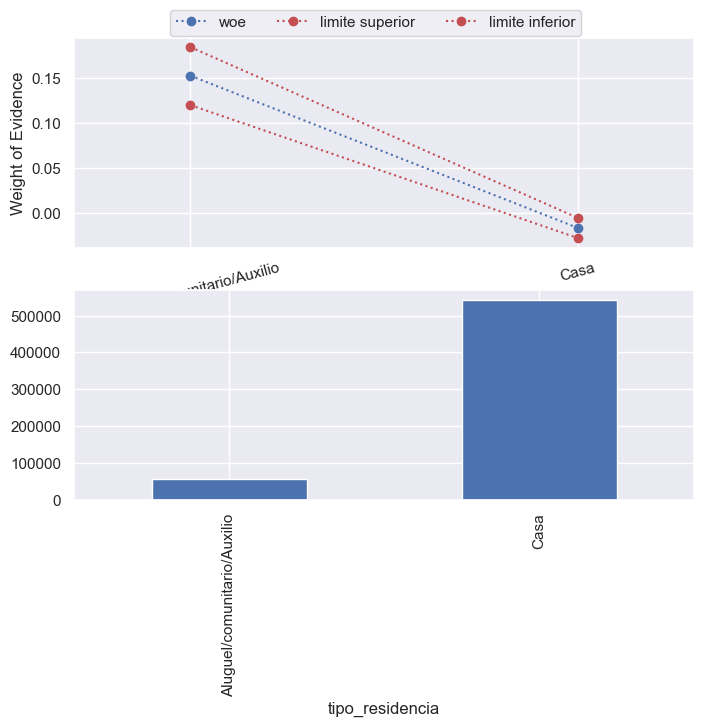

In [172]:
df1_train.tipo_residencia.replace(
    {
        'Aluguel': 'Aluguel/comunitario/Auxilio',
        'Com os pais': 'Aluguel/comunitario/Auxilio',
        'Comunitário': 'Aluguel/comunitario/Auxilio',
        'Estúdio': 'Casa',
        'Governamental': 'Aluguel/comunitario/Auxilio'
    },
    inplace=True)
biv_discreta('tipo_residencia', df1_train)

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Fundamental,6420,481,0.069700,Fundamental,6901,0.003065,0.075709,0.063691,-2.591306,-2.502130,-2.687900,0.141385,0.230561,0.044791
Médio,379939,25510,0.062918,Médio,405449,0.000381,0.063665,0.062170,-2.700940,-2.688333,-2.713688,0.031751,0.044358,0.019003
Pós graduação,608,43,0.066052,Pós graduação,651,0.009735,0.085167,0.046937,-2.648975,-2.374126,-3.010867,0.083716,0.358565,-0.278176
Superior completo,154354,9086,0.055592,Superior completo,163440,0.000567,0.056703,0.054481,-2.832514,-2.811552,-2.853874,-0.099823,-0.078861,-0.121183
Superior incompleto,22036,1523,0.064646,Superior incompleto,23559,0.001602,0.067786,0.061506,-2.671995,-2.621201,-2.725141,0.060696,0.111490,0.007550


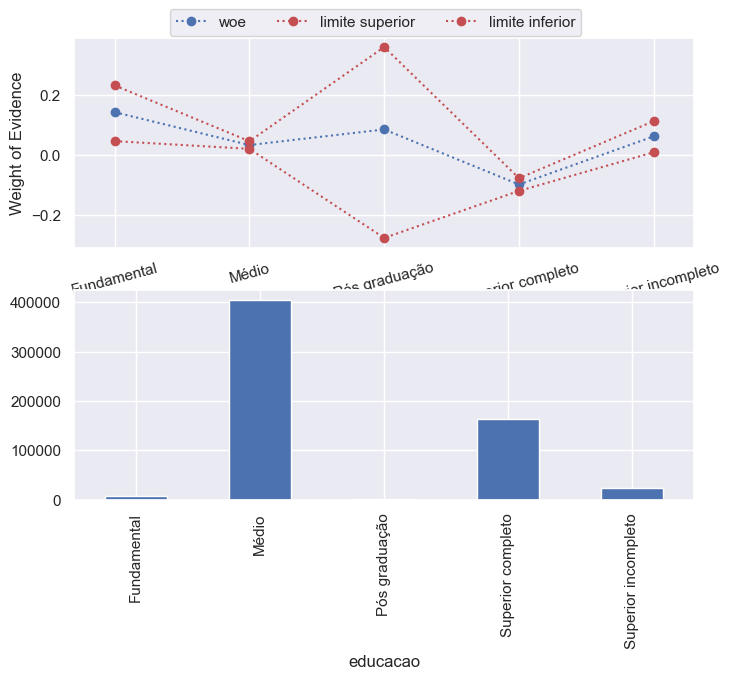

In [174]:
biv_discreta('educacao', df1_train)

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Ens. Superior,176998,10652,0.056765,Ens. Superior,187650,0.000534,0.057812,0.055718,-2.810391,-2.791005,-2.830116,-0.077700,-0.058314,-0.097425
Medio ou inferior,386359,25991,0.063031,Medio ou inferior,412350,0.000378,0.063773,0.062290,-2.699017,-2.686525,-2.711646,0.033674,0.046166,0.021045


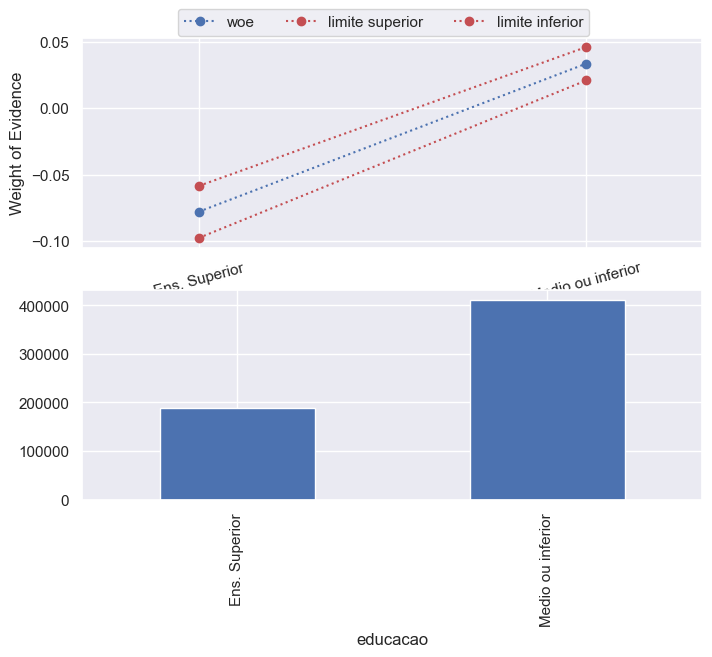

In [176]:
df1_train.educacao.replace(
    {
        'Fundamental': 'Medio ou inferior',
        'Médio': 'Medio ou inferior',
        'Superior completo': 'Ens. Superior',
        'Pós graduação': 'Ens. Superior',
        'Superior incompleto': 'Ens. Superior'
    },
    inplace=True)

biv_discreta('educacao', df1_train)

C:\Users\-__-\AppData\Local\Temp\ipykernel_9508\4194141464.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


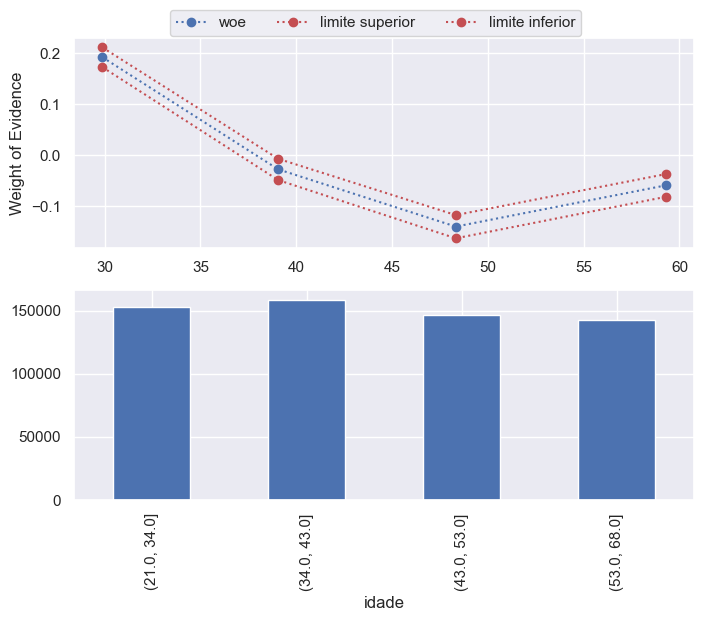

In [178]:
biv_continua('idade', 4, df1_train)

C:\Users\-__-\AppData\Local\Temp\ipykernel_9508\4194141464.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


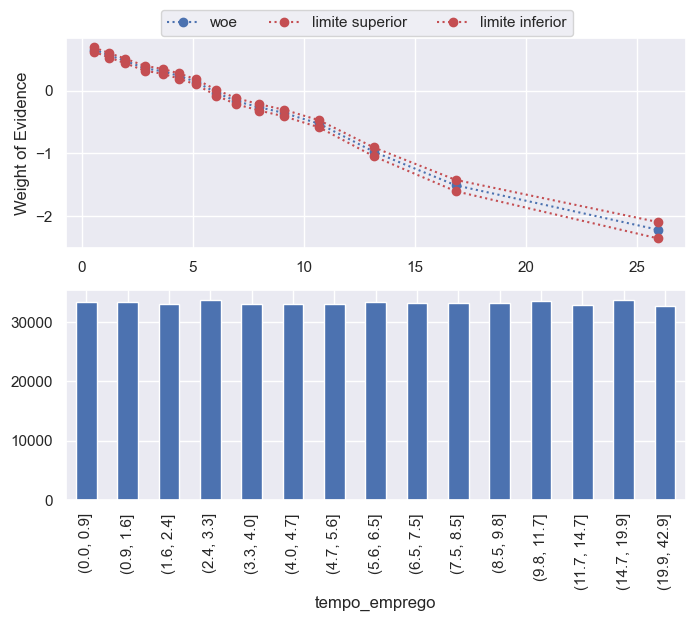

In [180]:
biv_continua('tempo_emprego', 15, df1_train)

C:\Users\-__-\AppData\Local\Temp\ipykernel_9508\4194141464.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


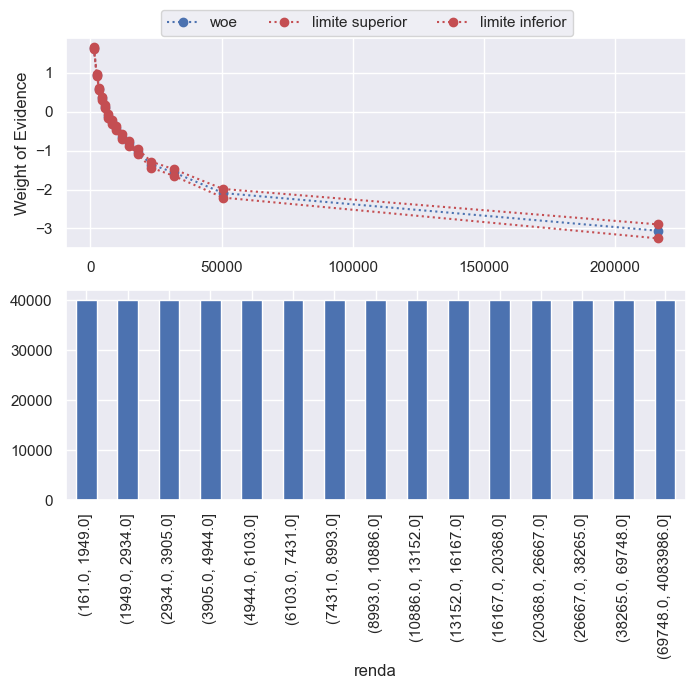

In [182]:
biv_continua('renda', 15, df1_train)

In [184]:
# Refletindo as mudanças nas variaveis na base de teste
df1_test = df_test.copy()
df1_test.tipo_renda.replace(
    {
        'Bolsista': 'Serv.Publico./Estudante',
        'Servidor público': 'Serv.Publico./Estudante',
        'Assalariado': 'Renda fixa',
        'Pensionista': 'Renda fixa'
    },
    inplace=True)

df1_test.educacao.replace(
    {
        'Fundamental': 'Medio ou inferior',
        'Médio': 'Medio ou inferior',
        'Superior completo': 'Ens. Superior',
        'Pós graduação': 'Ens. Superior',
        'Superior incompleto': 'Ens. Superior'
    },
    inplace=True)

df1_test.tipo_residencia.replace(
    {
        'Aluguel': 'Aluguel/comunitario/Auxilio',
        'Com os pais': 'Aluguel/comunitario/Auxilio',
        'Comunitário': 'Aluguel/comunitario/Auxilio',
        'Estúdio': 'Casa',
        'Governamental': 'Aluguel/comunitario/Auxilio'
    },
    inplace=True)

In [186]:
' + '.join(list(metadados.sort_values(by='IV', ascending=False).index))

'renda + tempo_emprego + idade + posse_de_imovel + tipo_renda + educacao + tipo_residencia + sexo + qt_pessoas_residencia + estado_civil + posse_de_veiculo + qtd_filhos + mau + bom'

In [188]:
formula = '''
    mau ~ renda + tempo_emprego + idade + posse_de_imovel + tipo_renda + educacao + tipo_residencia + sexo + qt_pessoas_residencia + estado_civil + posse_de_veiculo + qtd_filhos
'''

rl = smf.glm(formula, data=df1_train, family=sm.families.Binomial()).fit()

rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mau   No. Observations:               499125
Model:                            GLM   Df Residuals:                   499108
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0247e+05
Date:                Mon, 07 Oct 2024   Deviance:                   2.0484e+05
Time:                        11:07:56   Pearson chi2:                 1.42e+16
No. Iterations:                    11   Pseudo R-squ. (CS):            0.04469
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.3537      0.189     -7.180      0.000      -1.723      -0.984
posse_de_imovel[T.S]                     -0.0994      0.013     -7.763      0.000      -0.125      -0.074
tipo_renda[T.Renda fixa]                  0.0560      0.014      4.000      0.000       0.029       0.083
tipo_renda[T.Serv.Publico./Estudante]     0.0235      0.025      0.947      0.344      -0.025       0.072
educacao[T.Medio ou inferior]             0.0706      0.013      5.244      0.000       0.044       0.097
tipo_residencia[T.Casa]                  -0.0183      0.019     -0.960      0.337      -0.056       0.019
sexo[T.M]                                -0.1454      0.014    -10.556      0.000      -0.172      -0.118
estado_civil[T.Separado]                 -0.0947      0.096     -0.986      0.324      -0.283       0.094
estado_civil[T.Solteiro]                 -0.1030      0.094     -1.096      0.273      -0.287       0.081
estado_civil[T.União]                     0.0343      0.022      1.557      0.119      -0.009       0.077
estado_civil[T.Viúvo]                    -0.2479      0.103     -2.409      0.016      -0.450      -0.046
posse_de_veiculo[T.S]                     0.0287      0.013      2.163      0.031       0.003       0.055
renda                                 -9.747e-05   1.18e-06    -82.886      0.000   -9.98e-05   -9.52e-05
tempo_emprego                            -0.0260      0.002    -14.246      0.000      -0.030      -0.022
idade                                 -4.706e-05      0.001     -0.065      0.948      -0.001       0.001
qt_pessoas_residencia                    -0.1182      0.093     -1.276      0.202      -0.300       0.063
qtd_filhos                                0.1200      0.093      1.294      0.196      -0.062       0.302
=========================================================================================================
"""

In [189]:
#Retirando as variaveis com p-value > 0.05 como estado civil, tipo residencia, idade, qtd_filhos e qt_pessoas_residencia//Após a retirada não houve alteração nos valores de Acurácia

formula = '''
    mau ~ renda + tempo_emprego  + posse_de_imovel  + educacao + sexo  + posse_de_veiculo 
'''

rl = smf.glm(formula, data=df1_train, family=sm.families.Binomial()).fit()

rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mau   No. Observations:               499125
Model:                            GLM   Df Residuals:                   499118
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0249e+05
Date:                Mon, 07 Oct 2024   Deviance:                   2.0487e+05
Time:                        11:08:04   Pearson chi2:                 1.43e+16
No. Iterations:                    11   Pseudo R-squ. (CS):            0.04463
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.5652      0.017    -92.526      0.000      -1.598      -1.532
posse_de_imovel[T.S]             -0.1039      0.012     -8.341      0.000      -0.128      -0.080
educacao[T.Medio ou inferior]     0.0751      0.013      5.735      0.000       0.049       0.101
sexo[T.M]                        -0.1391      0.014    -10.210      0.000      -0.166      -0.112
posse_de_veiculo[T.S]             0.0266      0.013      2.032      0.042       0.001       0.052
renda                         -9.776e-05   1.17e-06    -83.268      0.000      -0.000   -9.55e-05
tempo_emprego                    -0.0259      0.002    -14.414      0.000      -0.029      -0.022
=================================================================================================
"""

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [203]:
# Primeiro, calcule a coluna 'score' para ambos os DataFrames
df1_train['score'] = rl.predict(df1_train)
df1_test['score'] = rl.predict(df1_test)

# Verifique se há NaNs
print(df1_train.isnull().sum())
print(df1_test.isnull().sum())

# Remova ou preencha NaNs
df1_train = df1_train.dropna(subset=['mau', 'score'])
df1_test = df1_test.dropna(subset=['mau', 'score'])

# Recalcule as métricas para o conjunto de treino
acc_train = metrics.accuracy_score(df1_train.mau, df1_train.score > .068)
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(df1_train.mau, df1_train.score)
auc_train = metrics.auc(fpr_train, tpr_train)
gini_train = 2 * auc_train - 1
ks_train = ks_2samp(df1_train.loc[df1_train.mau == 1, 'score'],
                    df1_train.loc[df1_train.mau != 1, 'score']).statistic

print(
    'Acurácia na base de treino: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
    .format(acc_train, auc_train, gini_train, ks_train))

print('-------------------------------------------------------')

# Recalcule as métricas para o conjunto de teste
acc_test = metrics.accuracy_score(df1_test.mau, df1_test.score > .068)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(df1_test.mau, df1_test.score)
auc_test = metrics.auc(fpr_test, tpr_test)
gini_test = 2 * auc_test - 1
ks_test = ks_2samp(df1_test.loc[df1_test.mau == 1, 'score'],
                   df1_test.loc[df1_test.mau != 1, 'score']).statistic

print(
    'Acurácia na base de teste / out of time: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
    .format(acc_test, auc_test, gini_test, ks_test))


C:\Users\-__-\AppData\Local\Temp\ipykernel_9508\2789903837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_train['score'] = rl.predict(df1_train)


sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
bom                      0
score                    0
dtype: int64
sexo                         0
posse_de_veiculo             0
posse_de_imovel              0
qtd_filhos                   0
tipo_renda                   0
educacao                     0
estado_civil                 0
tipo_residencia              0
idade                        0
tempo_emprego            25082
qt_pessoas_residencia        0
renda                        0
mau                          0
score                    25082
dtype: int64
Acurácia na base de treino: 60.1% 
AUC: 77.3% 
GINI: 54.6%
KS: 40.7%
-------------------------------------------------------
Acurácia n

# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [207]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [209]:
df = pd.read_feather('credit_scoring.ftr')
df.drop(['data_ref', 'index'], axis=1, inplace=True)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sexo                   750000 non-null  object 
 1   posse_de_veiculo       750000 non-null  object 
 2   posse_de_imovel        750000 non-null  object 
 3   qtd_filhos             750000 non-null  int64  
 4   tipo_renda             750000 non-null  object 
 5   educacao               750000 non-null  object 
 6   estado_civil           750000 non-null  object 
 7   tipo_residencia        750000 non-null  object 
 8   idade                  750000 non-null  int64  
 9   tempo_emprego          624043 non-null  float64
 10  qt_pessoas_residencia  750000 non-null  float64
 11  renda                  750000 non-null  float64
 12  mau                    750000 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 69.4+ MB


In [213]:
#Criando função para verificar se há nulos na base se True e numerico substitui pela média se true e categórico drop.
def verifica_nulos(df):
    for coluna in df.columns:
        if df[coluna].isnull().sum() > 0:
            if df[coluna].dtype in [np.float64, np.int64]:
                df[coluna].fillna(df[coluna].mean(), inplace=True)
            else:
                df.dropna(subset=[coluna], inplace=True)
    return df


verifica_nulos(df)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,M,N,S,0,Empresário,Superior completo,Casado,Casa,48,3.038356,2.0,2109.99,False
749996,F,N,S,0,Pensionista,Médio,Solteiro,Casa,65,7.748574,1.0,1389.39,False
749997,M,S,N,2,Assalariado,Médio,Casado,Casa,43,10.375342,4.0,649.06,True
749998,F,N,S,0,Assalariado,Médio,Viúvo,Casa,56,13.780822,1.0,4216.72,True


In [215]:
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
mau                      0
dtype: int64

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [217]:
df.shape

(750000, 13)

In [219]:
def remove_outliers_iqr(df):
    for coluna in df.columns:
        if np.issubdtype(df[coluna].dtype, np.number):
            # Valores do quartil 25 e quartil 75
            q25, q75 = np.percentile(df[coluna],
                                     25), np.percentile(df[coluna], 75)

            # Interquartile range
            coluna_iqr = q75 - q25

            # Limiar
            coluna_cut_off = coluna_iqr * 1.5
            # Limite superior e inferior
            coluna_lower, coluna_upper = q25 - coluna_cut_off, q75 + coluna_cut_off

            # DataFrame sem os outliers
            df = df[(df[coluna] >= coluna_lower)
                    & (df[coluna] <= coluna_upper)].copy()

    return df

In [221]:
def remove_outliers_iqr(df):
    for coluna in df.columns:
        if np.issubdtype(df[coluna].dtype, np.number):
            # Valores do quartil 25 e quartil 75
            q25, q75 = np.percentile(df[coluna],
                                     25), np.percentile(df[coluna], 75)

            # Interquartile range
            coluna_iqr = q75 - q25

            # Limiar
            coluna_cut_off = coluna_iqr * 1.5
            # Limite superior e inferior
            coluna_lower, coluna_upper = q25 - coluna_cut_off, q75 + coluna_cut_off

            # DataFrame sem os outliers
            df = df[(df[coluna] >= coluna_lower)
                    & (df[coluna] <= coluna_upper)].copy()

    return df


df = remove_outliers_iqr(df)

df.shape

(625133, 13)

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [223]:
# Criando função para seleção de variáveis

from sklearn.ensemble import RandomForestClassifier


def seleciona_variaveis(df, target):
    # Separando os dados em features (X) e variável alvo (y)
    X = df.drop(target, axis=1)
    y = df[target]

    # Aplicando a codificação one-hot para as colunas categóricas
    categorical_cols = df.select_dtypes(include=['object']).columns
    X = pd.get_dummies(X, columns=categorical_cols)

    # Criando o modelo de RandomForestClassifier
    model = RandomForestClassifier()

    # Treinando o modelo
    model.fit(X, y)

    # Obtendo a importância das features
    feature_importance = pd.Series(
        model.feature_importances_,
        index=X.columns).sort_values(ascending=False)

    # Retornando as top N variáveis mais importantes
    N = 8  # Defina o número de variáveis que deseja manter
    top_features = feature_importance[:N]

    return top_features

seleciona_variaveis(df, 'mau')

renda                     0.786175
tempo_emprego             0.079071
idade                     0.072939
qt_pessoas_residencia     0.007144
qtd_filhos                0.005600
posse_de_veiculo_N        0.003296
posse_de_veiculo_S        0.003232
tipo_renda_Assalariado    0.003103
dtype: float64

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [225]:
def pca(df, target):

    # Separando os dados em features (X) e variável alvo (y)
    X = df.drop(target, axis=1)
    y = df[target]

    # Aplicando a codificação one-hot para as colunas categóricas
    categorical_cols = df.select_dtypes(include=['object']).columns
    X = pd.get_dummies(X, columns=categorical_cols)

    # Criando uma instância do PCA com o número de componentes desejado
    n_components = 5
    pca = PCA(n_components=n_components)
    pca.fit(X)

    # Ajustando o PCA aos dados
    X_pca = pca.transform(X)

    # Criando um DataFrame para as componentes principais
    pca_df = pd.DataFrame(data=X_pca)

    return pca_df


pca(df, 'mau')

,0,1,2,3,4
0,-6172.423188,0.244678,1.713633,-1.683200,-0.347171
1,-5507.624183,-8.004240,-0.060870,-0.372437,0.334240
2,-7105.525140,-12.275394,-3.697594,1.801498,-1.304867
3,5033.358418,10.615286,5.117933,-0.156054,-0.268970
4,-5796.733914,-11.642028,4.180024,-1.825261,0.676830
...,...,...,...,...,...
625128,-6577.823343,4.903569,-2.455139,-0.006112,0.319049
625129,-7298.421276,22.361618,0.977159,-0.840426,-0.316999
625130,-8038.752625,0.543297,5.542137,2.515742,0.861815
625131,-4471.091123,13.600633,7.295678,-1.080662,-0.245171


### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [227]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [229]:
# Função para get_dummies para columas catégoricas do dataframe

def get_dummies(df):
    df = pd.get_dummies(df, drop_first=True)
    return df


get_dummies(df)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,43,6.873973,1.0,2515.39,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,0,35,4.526027,2.0,3180.19,False,False,True,True,False,...,False,False,False,False,False,True,False,False,False,False
2,2,31,0.243836,4.0,1582.29,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,54,12.772603,2.0,13721.17,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,31,8.432877,1.0,2891.08,False,False,True,False,False,...,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,0,48,3.038356,2.0,2109.99,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
749996,0,65,7.748574,1.0,1389.39,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
749997,2,43,10.375342,4.0,649.06,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
749998,0,56,13.780822,1.0,4216.72,True,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False


### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [231]:
#criando pipeline preprocessamento()

preprocessamento = Pipeline(
    steps=[('verifica_nulos',
            verifica_nulos(df)), ('remove_outliers',
                                  remove_outliers_iqr(df)), ('pca'),
           pca(df, 'mau'), ('get_dummies', get_dummies(df))])

In [233]:
preprocessamento

TypeError:         qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia     renda  \
0                0     43       6.873973                    1.0   2515.39   
1                0     35       4.526027                    2.0   3180.19   
2                2     31       0.243836                    4.0   1582.29   
3                0     54      12.772603                    2.0  13721.17   
4                0     31       8.432877                    1.0   2891.08   
...            ...    ...            ...                    ...       ...   
749995           0     48       3.038356                    2.0   2109.99   
749996           0     65       7.748574                    1.0   1389.39   
749997           2     43      10.375342                    4.0    649.06   
749998           0     56      13.780822                    1.0   4216.72   
749999           2     43      10.375342                    4.0   4460.69   

          mau  sexo_M  posse_de_veiculo_S  posse_de_imovel_S  \
0       False   False               False              False   
1       False   False                True               True   
2       False   False               False              False   
3       False   False               False              False   
4       False   False                True              False   
...       ...     ...                 ...                ...   
749995  False    True               False               True   
749996  False   False               False               True   
749997   True    True                True              False   
749998   True   False               False               True   
749999  False    True                True              False   

        tipo_renda_Bolsista  ...  educacao_Superior incompleto  \
0                     False  ...                         False   
1                     False  ...                         False   
2                     False  ...                         False   
3                     False  ...                         False   
4                     False  ...                          True   
...                     ...  ...                           ...   
749995                False  ...                         False   
749996                False  ...                         False   
749997                False  ...                         False   
749998                False  ...                         False   
749999                False  ...                         False   

        estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                       False                   True               False   
1                       False                  False               False   
2                       False                  False               False   
3                       False                  False               False   
4                       False                   True               False   
...                       ...                    ...                 ...   
749995                  False                  False               False   
749996                  False                   True               False   
749997                  False                  False               False   
749998                  False                  False               False   
749999                  False                  False               False   

        estado_civil_Viúvo  tipo_residencia_Casa  tipo_residencia_Com os pais  \
0                    False                  True                        False   
1                    False                  True                        False   
2                    False                  True                        False   
3                    False                  True                        False   
4                    False                  True                        False   
...                    ...                   ...                          ...   
749995               False                  True                        False   
749996               False                  True                        False   
749997               False                  True                        False   
749998                True                  True                        False   
749999               False                  True                        False   

        tipo_residencia_Comunitário  tipo_residencia_Estúdio  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   
...                             ...                      ...   
749995                        False                    False   
749996                        False                    False   
749997                        False                    False   
749998                        False                    False   
749999                        False                    False   

        tipo_residencia_Governamental  
0                               False  
1                               False  
2                               False  
3                               False  
4                               False  
...                               ...  
749995                          False  
749996                          False  
749997                          False  
749998                          False  
749999                          False  

[625133 rows x 26 columns] is not an estimator instance.

TypeError:         qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia     renda  \
0                0     43       6.873973                    1.0   2515.39   
1                0     35       4.526027                    2.0   3180.19   
2                2     31       0.243836                    4.0   1582.29   
3                0     54      12.772603                    2.0  13721.17   
4                0     31       8.432877                    1.0   2891.08   
...            ...    ...            ...                    ...       ...   
749995           0     48       3.038356                    2.0   2109.99   
749996           0     65       7.748574                    1.0   1389.39   
749997           2     43      10.375342                    4.0    649.06   
749998           0     56      13.780822                    1.0   4216.72   
749999           2     43      10.375342                    4.0   4460.69   

          mau  sexo_M  posse_de_veiculo_S  posse_de_imovel_S  \
0       False   False               False              False   
1       False   False                True               True   
2       False   False               False              False   
3       False   False               False              False   
4       False   False                True              False   
...       ...     ...                 ...                ...   
749995  False    True               False               True   
749996  False   False               False               True   
749997   True    True                True              False   
749998   True   False               False               True   
749999  False    True                True              False   

        tipo_renda_Bolsista  ...  educacao_Superior incompleto  \
0                     False  ...                         False   
1                     False  ...                         False   
2                     False  ...                         False   
3                     False  ...                         False   
4                     False  ...                          True   
...                     ...  ...                           ...   
749995                False  ...                         False   
749996                False  ...                         False   
749997                False  ...                         False   
749998                False  ...                         False   
749999                False  ...                         False   

        estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                       False                   True               False   
1                       False                  False               False   
2                       False                  False               False   
3                       False                  False               False   
4                       False                   True               False   
...                       ...                    ...                 ...   
749995                  False                  False               False   
749996                  False                   True               False   
749997                  False                  False               False   
749998                  False                  False               False   
749999                  False                  False               False   

        estado_civil_Viúvo  tipo_residencia_Casa  tipo_residencia_Com os pais  \
0                    False                  True                        False   
1                    False                  True                        False   
2                    False                  True                        False   
3                    False                  True                        False   
4                    False                  True                        False   
...                    ...                   ...                          ...   
749995               False                  True                        False   
749996               False                  True                        False   
749997               False                  True                        False   
749998                True                  True                        False   
749999               False                  True                        False   

        tipo_residencia_Comunitário  tipo_residencia_Estúdio  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   
...                             ...                      ...   
749995                        False                    False   
749996                        False                    False   
749997                        False                    False   
749998                        False                    False   
749999                        False                    False   

        tipo_residencia_Governamental  
0                               False  
1                               False  
2                               False  
3                               False  
4                               False  
...                               ...  
749995                          False  
749996                          False  
749997                          False  
749998                          False  
749999                          False  

[625133 rows x 26 columns] is not an estimator instance.

Pipeline(steps=[('verifica_nulos',
                        sexo posse_de_veiculo posse_de_imovel  qtd_filhos   tipo_renda  \
0         F                N               N           0   Empresário   
1         F                S               S           0  Assalariado   
2         F                N               N           2  Assalariado   
3         F                N               N           0  Assalariado   
4         F                S               N           0  Assalariado   
...     ...              ...             ...         ...          ...   
749995    M                N               S           0   Empresário   
749996    F                N               S           0  Pensionista   
749997    M                S               N           2  Assalariado   
749998    F                N               S           0  Assalariado   
749999    M                S               N           2  Assalariado   

                   educacao estado_civil tipo_residencia  idade  \
0   

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [1]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [2]:
dataset = df.sample(50000)
dataset.drop(['data_ref', 'index'], axis=1, inplace=True)

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' +
      str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (47500, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2500, 13)


In [8]:
from pycaret.classification import *
exp_clf101 = setup(data=data, target='mau', session_id=123)

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(47500, 13)"
4,Transformed data shape,"(47500, 30)"
5,Transformed train set shape,"(33250, 30)"
6,Transformed test set shape,"(14250, 30)"
7,Numeric features,5
8,Categorical features,7
9,Rows with missing values,16.6%


In [9]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [11]:
lgbm = create_model('lightgbm', fix_imbalance=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9221,0.7572,0.0272,0.4375,0.0513,0.0426,0.0938
1,0.9212,0.7639,0.0233,0.3529,0.0438,0.0345,0.0740
2,0.9215,0.7604,0.0350,0.4091,0.0645,0.0530,0.1014
3,0.9230,0.7714,0.0311,0.5333,0.0588,0.0507,0.1150
4,0.9233,0.7496,0.0350,0.5625,0.0659,0.0574,0.1263
5,0.9218,0.7543,0.0195,0.3846,0.0370,0.0298,0.0721
6,0.9233,0.7602,0.0233,0.6000,0.0449,0.0394,0.1075
7,0.9215,0.7618,0.0233,0.3750,0.0440,0.0352,0.0775
8,0.9230,0.7366,0.0156,0.5000,0.0303,0.0258,0.0779


In [12]:
tuned_lgbm = tune_model(lgbm, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9080,0.7245,0.0817,0.2308,0.1207,0.0836,0.0964
1,0.9086,0.7174,0.0623,0.2025,0.0952,0.0611,0.0732
2,0.9107,0.7232,0.0817,0.2561,0.1239,0.0899,0.1065
3,0.9116,0.7279,0.0817,0.2658,0.1250,0.0920,0.1101
4,0.9077,0.7140,0.0739,0.2159,0.1101,0.0736,0.0856
5,0.9011,0.7147,0.0545,0.1400,0.0784,0.0367,0.0413
6,0.9104,0.7189,0.0623,0.2192,0.0970,0.0650,0.0796
7,0.9083,0.7305,0.0545,0.1842,0.0841,0.0506,0.0612
8,0.9089,0.6936,0.0664,0.2099,0.1009,0.0663,0.0788


Fitting 10 folds for each of 10 candidates, totalling 100 fits


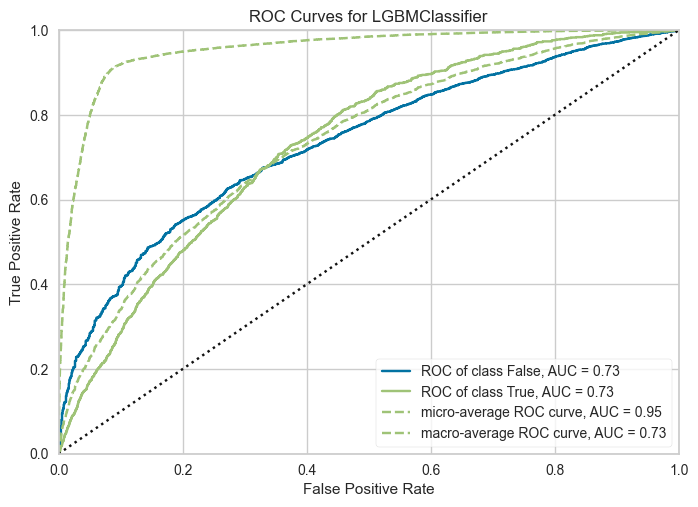

In [13]:
plot_model(tuned_lgbm, plot='auc')

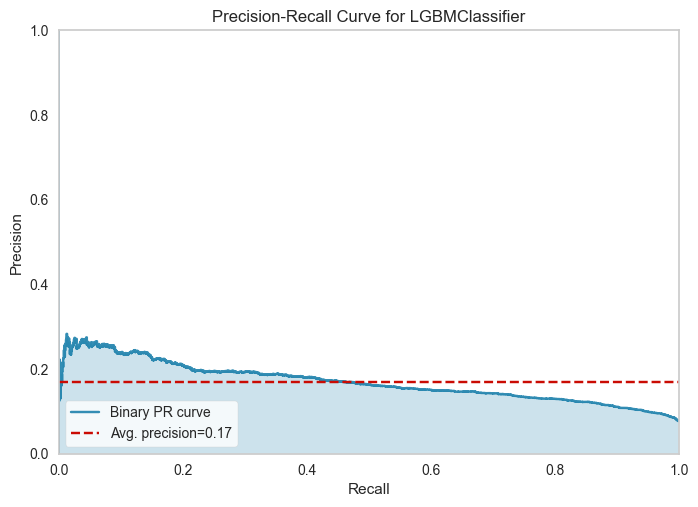

In [14]:
plot_model(tuned_lgbm, plot='pr')

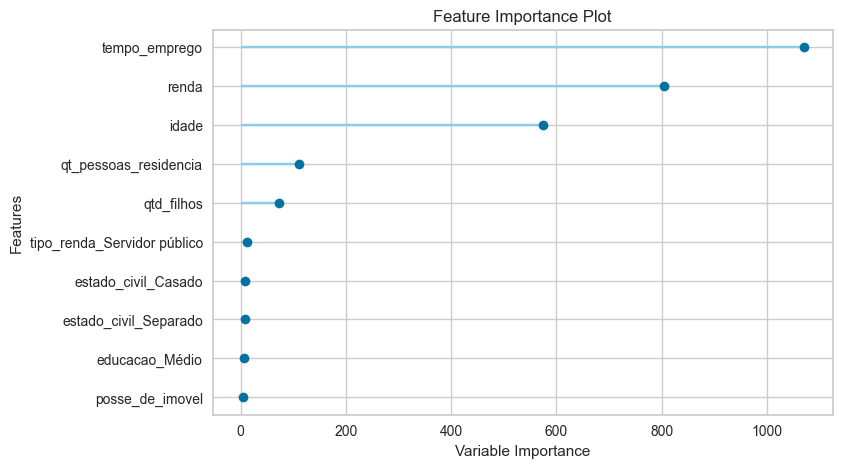

In [15]:
plot_model(tuned_lgbm, plot='feature')

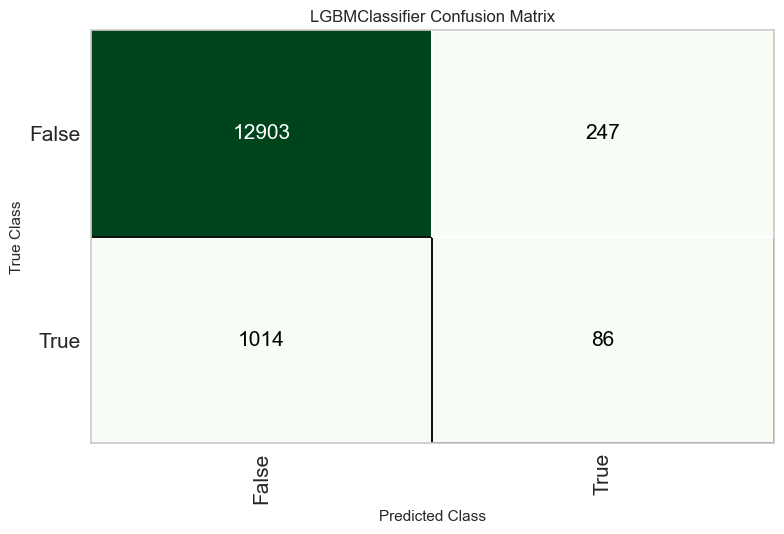

In [16]:
plot_model(tuned_lgbm, plot='confusion_matrix')

In [17]:
# Avaliando na base out of time

predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9115,0.7330,0.0782,0.2583,0.1200,0.0873,0.1049


[LightGBM] [Warning] Unknown parameter: fix_imbalance
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] Unknown parameter: fix_imbalance
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,prediction_label,prediction_score
17961,F,N,S,0,Assalariado,Médio,Viúvo,Casa,47,6.964384,1.0,7065.200195,False,0,0.9872
35500,F,S,N,0,Assalariado,Médio,Casado,Governamental,47,2.679452,2.0,8195.179688,False,0,0.9910
30815,M,S,S,1,Assalariado,Médio,Casado,Governamental,34,3.454794,3.0,3784.370117,False,0,0.8824
30603,F,N,N,0,Assalariado,Médio,Casado,Casa,40,13.873973,2.0,34017.289062,False,0,0.9927
28541,F,N,S,1,Empresário,Médio,Casado,Casa,44,16.643835,3.0,46808.140625,False,0,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35434,F,N,S,0,Empresário,Médio,Separado,Casa,36,8.638356,1.0,9493.049805,False,0,0.9935
19619,M,S,S,0,Empresário,Médio,Casado,Casa,28,3.095891,2.0,1995.150024,False,0,0.8923
31083,F,N,N,0,Assalariado,Médio,Separado,Casa,39,2.186301,1.0,1247.640015,False,0,0.8334
46252,M,S,S,1,Empresário,Superior completo,Casado,Casa,41,4.016438,3.0,11298.980469,False,0,0.9926


In [18]:
# Preparando para salvar o modelo.

final_lgbm = finalize_model(tuned_lgbm)

In [19]:
# Verificando os parâmetros

print(final_lgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWra...
                                colsample_bytree=1.0, feature_fraction=0.5,
                        

In [20]:
# Salvando localmente

save_model(final_lgbm, 'Final LGBM Model 19mai2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWra...
                                 colsample_bytree=1.0, feature_fraction=0.5,
         